Abstract 
- Over the time, people have collected the sensory data on quality wine in terms of few attributes. Here, in this assignment we will be using that dataset to train machine learning models and make a fresh predictions on a new set of data, to help people access the quality of wine with the given set of attributes. This project will help the wine industry and wine testers to great extent.

Variable Description                                                  
1) Fixed Acidity - Quantity of non volatile acids in the wine.               
2) Volatile Acidity - Quantity of volatile acids like acetic acid in the wine.                                                                     
3) Citric Acid - Quantity of citric acid in wine, which gives sour taste to wine                                                             
4) Residual Sugar - Amount of sugar left in the wine after the process of fermentation                                                         
5) Chlorides - Quantity of salts in wine                               
6) Free Sulphur dioxide - Amount of free form of SO2, which prevents the oxidation of wine                                                 
7) Total Sulphur dioxide - Total Amount of SO2 - free and bonded in wine.    
8) Density - Density of wine       
9) pH - pH value of wine                          
10) Sulphates - Amount of sulphates in wine used as wine additive           
11) Alcohol - Quantity of alcohol on wine                                   
12) Quality - Output variable between (0 to 10)                                                                                                                                                                                                                                                          

In [2]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [3]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 8)})

In [4]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [5]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

3


In [6]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:16657..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)
  Starting server from C:\Users\Karan\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Karan\AppData\Local\Temp\tmpw8fa06in
  JVM stdout: C:\Users\Karan\AppData\Local\Temp\tmpw8fa06in\h2o_Karan_started_from_python.out
  JVM stderr: C:\Users\Karan\AppData\Local\Temp\tmpw8fa06in\h2o_Karan_started_from_python.err
  Server is running at http://127.0.0.1:16657
Connecting to H2O server at http://127.0.0.1:16657 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_Karan_6266c7
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.938 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:16657
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.0 final
--------------------------  -----------------------------

Exploratory Data Analysis (EDA)

In [7]:
pandas_df = pd.read_csv(
    "https://raw.githubusercontent.com/KaranAgrawal1509/Wine-Quality-Analysis/main/WineQT.csv"
)  # Reading CSV file into Pandas DataFrame
pandas_df = pandas_df.drop("Id", axis = 1)

In [8]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [9]:
pandas_df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
pandas_df.shape  # Shape of the dataframe - Here, we have 1143 samples of data with 12 predictors and 1 result

(1143, 12)

In [11]:
pandas_df.head()  # Sample of how our data looks

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [12]:
columns = list(pandas_df.columns)
print(columns)  # Name of all predictors and result

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [13]:
pandas_df.describe()  # Statistical description of our dataset

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<AxesSubplot: >

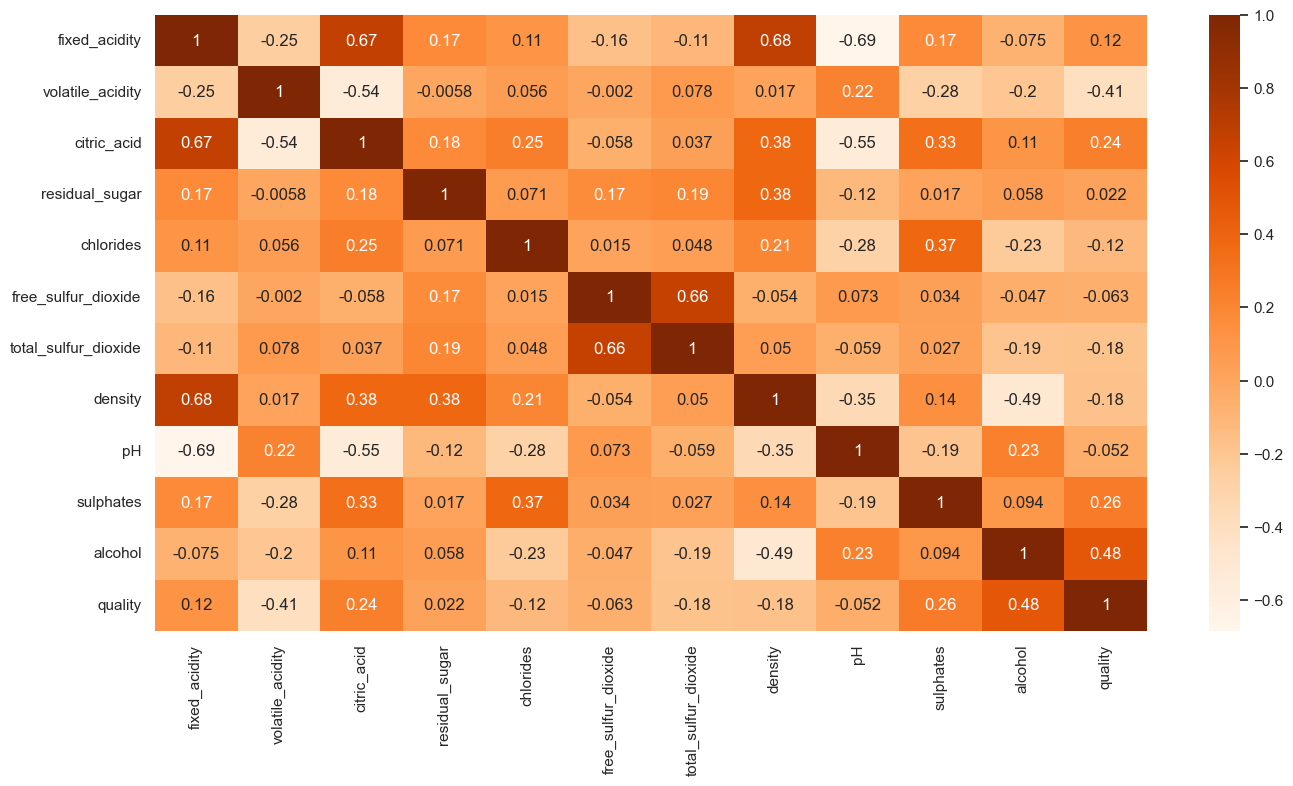

In [14]:
sns.heatmap(
    pandas_df.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

# Correlation Analysis

Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the *Pearson correlation coefficient*. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

From the Above Matrix we can conclude a few things
- Total Sulphur Dioxide and Free Sulphur Dioxide is highly correlated
- pH and fixed_acidity is highly correlated

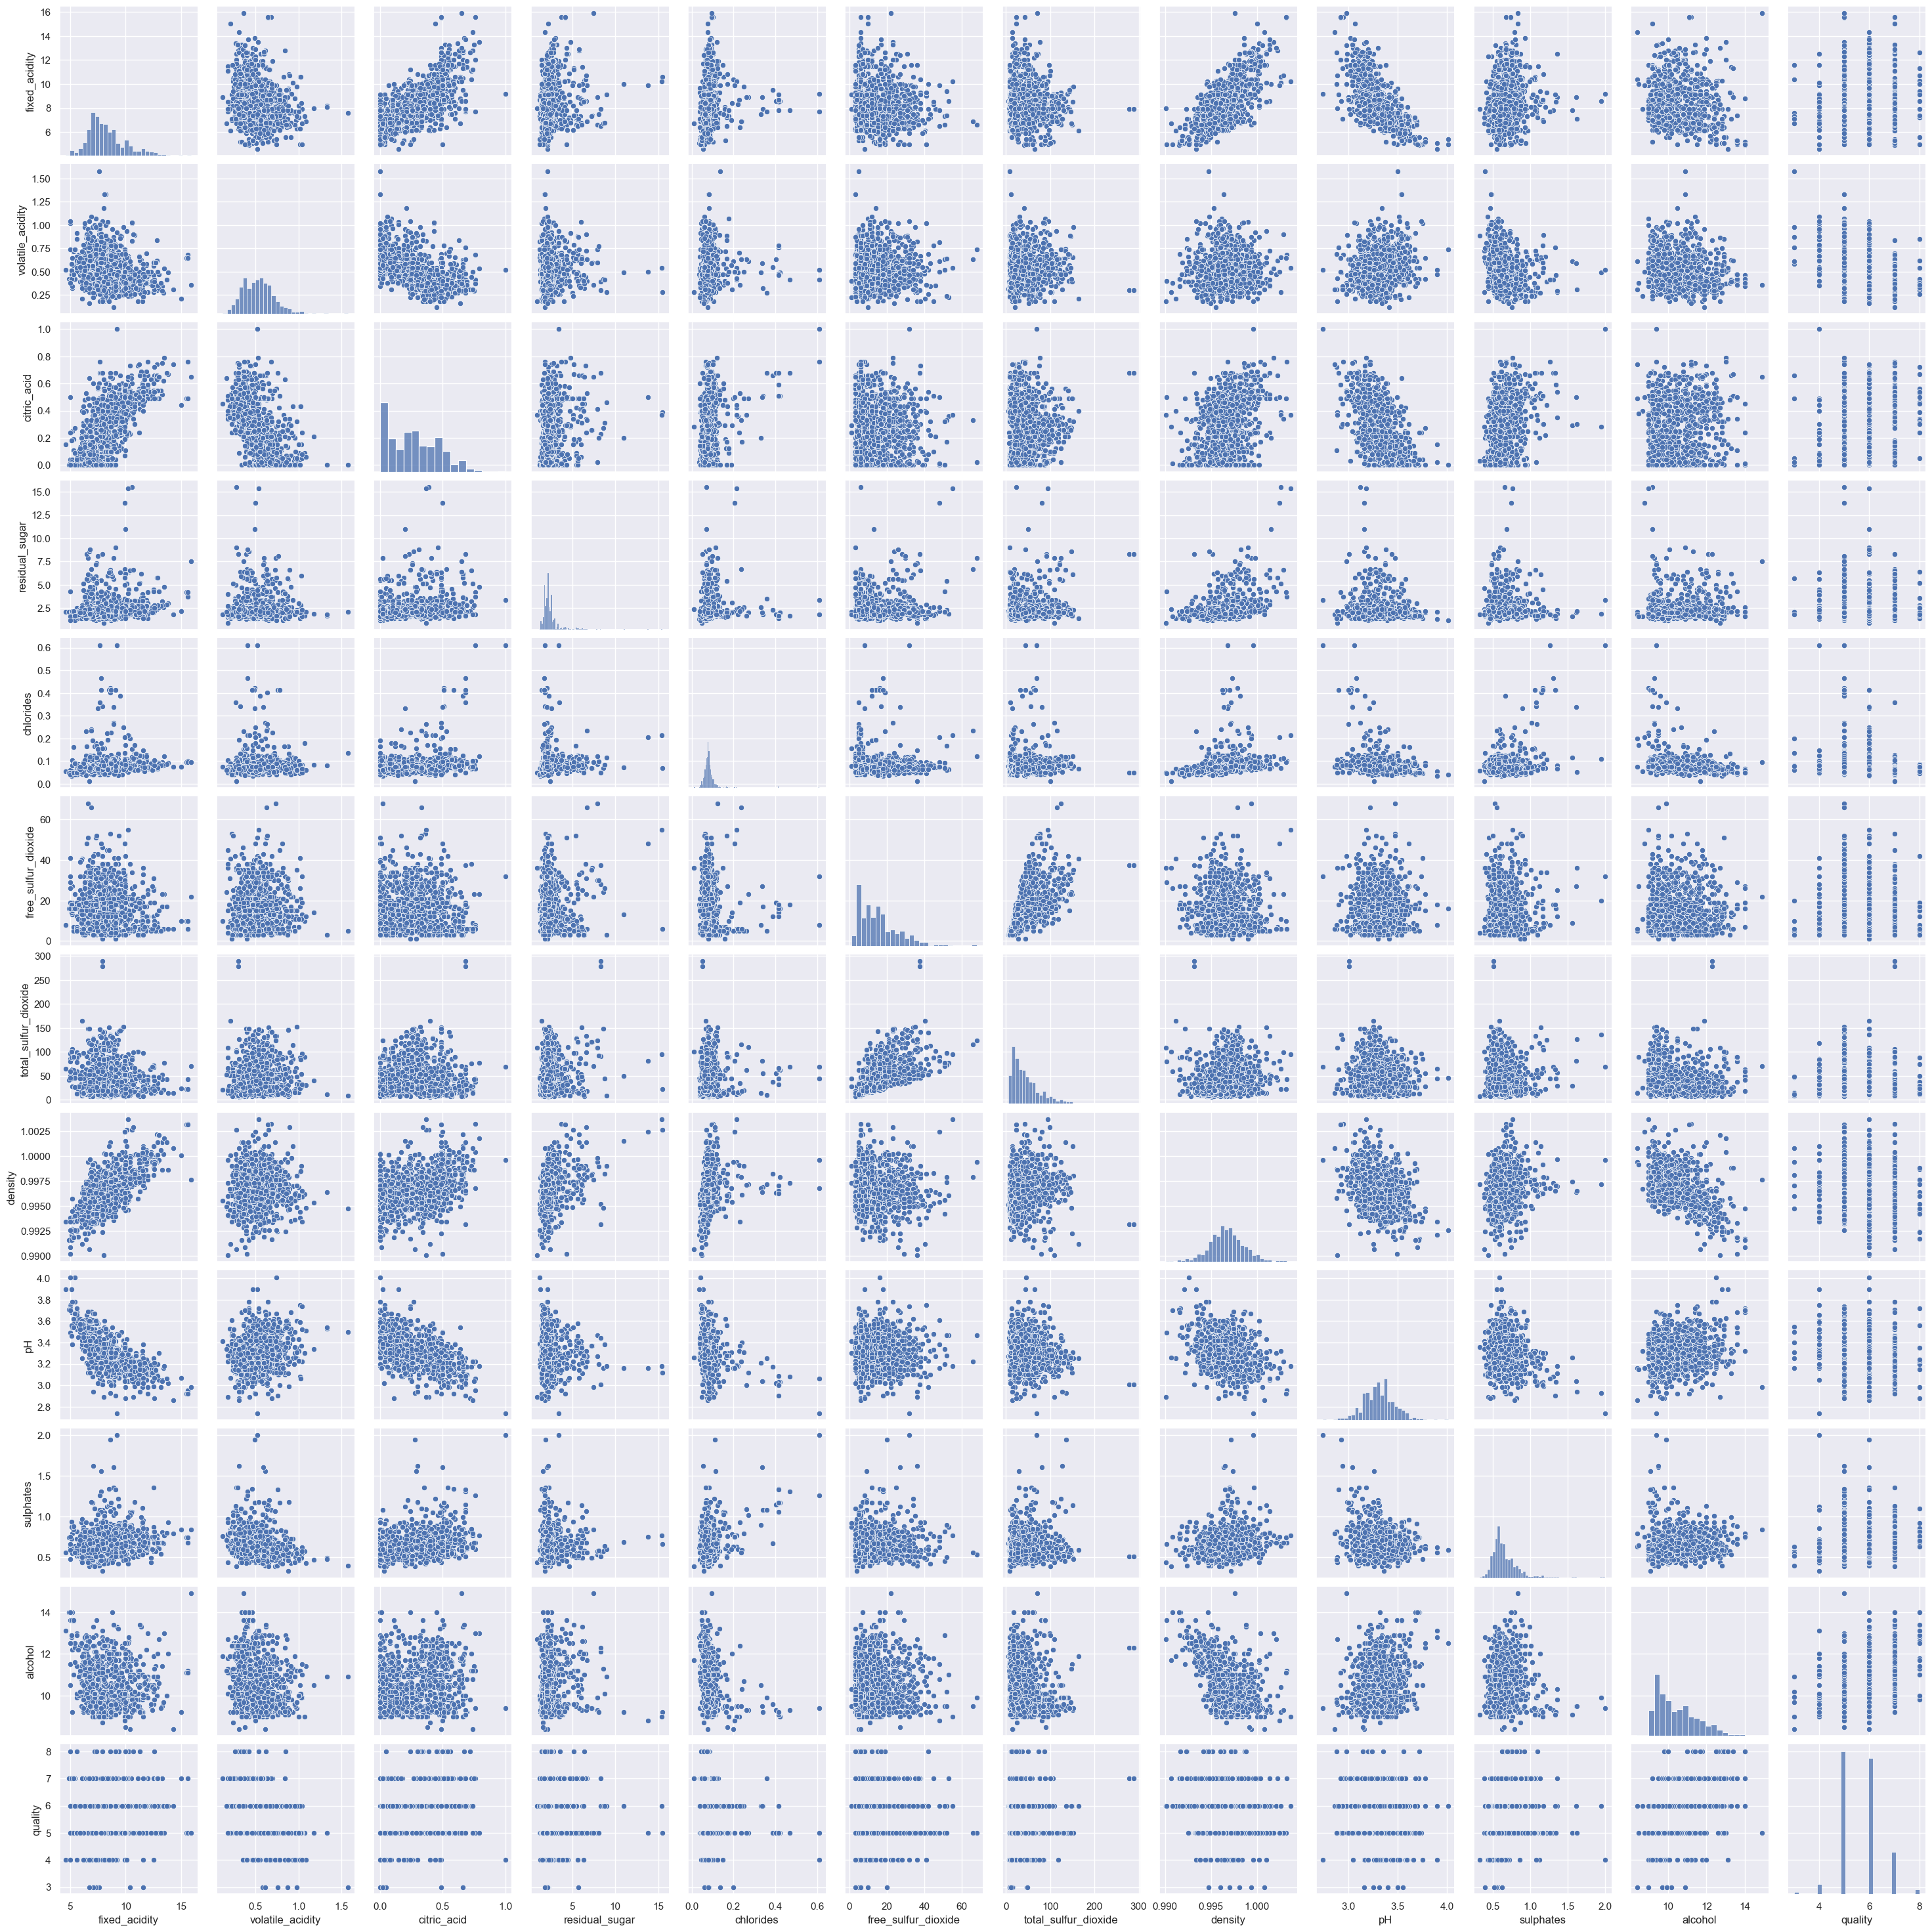

In [15]:
sns.pairplot(
    pandas_df
)  # All attributes are plotted against each other to see the pattern of distribution

# Interpreting PairPlot
- A pair plot is a graphical representation of pairwise relationships between variables in a dataset. It displays scatter plots for each pair of variables
- Relationship between variables: The scatter plots show the relationship between pairs of variables. If two variables are highly correlated, the scatter plot will show a strong linear relationship between them. If there is no correlation between the variables, the scatter plot will show a random distribution of points. The pair plot can help identify variables that have a strong positive or negative correlation.

- Distribution of variables: The histograms show the distribution of each variable. If a variable has a normal distribution, the histogram will be bell-shaped. If a variable is skewed, the histogram will be asymmetric. The pair plot can help identify variables that have non-normal distributions or outliers.

- Outliers: The scatter plots can reveal any outliers that may exist in the dataset. Outliers are data points that are far from the other data points and can have a significant impact on statistical models.

- Patterns and trends: By examining the scatter plots, you can identify patterns and trends in the data. For example, you may see that the relationship between two variables changes over time, or that there is a nonlinear relationship between two variables.

- Potential predictors: By examining the scatter plots, you can identify variables that may be potential predictors for a statistical model. Variables that have a strong correlation with the target variable may be good predictors for the model.


In [16]:
df = h2o.H2OFrame(
    pandas_df
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
df.types  # Datatype of all attributes, here the result ("quality") is int hence it can be solved using the regression. If this problem was supposed to solved using the classification method - this attributes datatype must be converted into enum

{'fixed_acidity': 'real',
 'volatile_acidity': 'real',
 'citric_acid': 'real',
 'residual_sugar': 'real',
 'chlorides': 'real',
 'free_sulfur_dioxide': 'real',
 'total_sulfur_dioxide': 'real',
 'density': 'real',
 'pH': 'real',
 'sulphates': 'real',
 'alcohol': 'real',
 'quality': 'int'}

In [18]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [19]:
print(df_train.shape)
print(df_test.shape)

(914, 12)
(229, 12)


In [20]:
df_train.head()

fixed_acidity    volatile_acidity    citric_acid    residual_sugar    chlorides    free_sulfur_dioxide    total_sulfur_dioxide    density    pH    sulphates    alcohol    quality
---------------  ------------------  -------------  ----------------  -----------  ---------------------  ----------------------  ---------  ----  -----------  ---------  ---------
            7.4               0.7             0                  1.9        0.076                     11                      34     0.9978  3.51         0.56        9.4          5
            7.8               0.88            0                  2.6        0.098                     25                      67     0.9968  3.2          0.68        9.8          5
           11.2               0.28            0.56               1.9        0.075                     17                      60     0.998   3.16         0.58        9.8          6
            7.4               0.7             0                  1.9        0.076                     11                      34     0.9978  3.51         0.56        9.4          5
            7.4               0.66            0                  1.8        0.075                     13                      40     0.9978  3.51         0.56        9.4          5
            7.3               0.65            0                  1.2        0.065                     15                      21     0.9946  3.39         0.47       10            7
            7.8               0.58            0.02               2          0.073                      9                      18     0.9968  3.36         0.57        9.5          7
            6.7               0.58            0.08               1.8        0.097                     15                      65     0.9959  3.28         0.54        9.2          5
            5.6               0.615           0                  1.6        0.089                     16                      59     0.9943  3.58         0.52        9.9          5
            7.8               0.61            0.29               1.6        0.114                      9                      29     0.9974  3.26         1.56        9.1          5
[10 rows x 12 columns]

In [21]:
X = df.columns
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [22]:
# Set target and predictor variables
y = "quality"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [23]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [24]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |
17:03:18.684: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_6_AutoML_1_20230214_170318


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       10/38
# GBM base models (used / total)           4/18
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  3/17
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0688177075767546
RMSE: 0.2623312935521696
MAE: 0.19847699432766083
RMSLE: 0.041344344331801335
Mean Residual Deviance: 0.0688177075767546
R^2: 0.8946667638243315
Null degrees of freedom: 913
Residual degrees of freedom: 903
Null deviance: 597.1466083151031
Residual deviance: 62.899384725153695
AIC: 171.68674941319603

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3627429009237864
RMSE: 0.6022814133972477
MAE: 0.4407817222441522
RMSLE: 0.09258914271387854
Mean Residual Deviance: 0.3627429009237864
R^2: 0.444781219841758
Null degrees of freedom: 913
Residual degrees of freedom: 902
Null deviance: 597.7046154004634
Residual deviance: 331.5470114443408
AIC: 1692.9679234780697

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.442993   0.0146949  0.444562      0.42826       0.431786      0.444654      0.465706
mean_residual_deviance  0.363828   0.0252982  0.388443      0.322116      0.360748      0.374686      0.373146
mse                     0.363828   0.0252982  0.388443      0.322116      0.360748      0.374686      0.373146
null_deviance           119.541    10.0402    132.667       110.268       113.913       127.901       112.956
r2                      0.441597   0.0239446  0.44854       0.470929      0.435643      0.447529      0.405346
residual_deviance       66.5552    5.66069    73.0273       58.303        64.2131       70.0663       67.1662
rmse                    0.60288    0.0213135  0.623252      0.567553      0.600623      0.612116      0.610856
rmsle                   0.0926047  0.0048122  0.0984505     0.0854729     0.0948198     0.093202      0.0910783

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

We can see above that the best model, is slighly overfitting on the dataset as there is a significant difference between the metrics on training and validation dataset
# Understanding the Parameters
- Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

- Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

- Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

- Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.

- Mean Residual Deviance: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

- R-squared (R^2): The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.

- Null Degrees of Freedom: The Null Degrees of Freedom is the number of observations in the dataset minus 1. It represents the number of observations in the dataset that are free to vary, given the number of parameters in the model.

- Residual Degrees of Freedom: The Residual Degrees of Freedom is the number of observations in the dataset minus the number of parameters in the model. It represents the number of observations in the dataset that are free to vary after taking into account the number of parameters in the model.

- Null Deviance: The Null Deviance is the deviance of the null model, which is the model with no independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

- Residual Deviance: The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

- Akaike Information Criterion (AIC): The AIC is a measure of the quality of a model that takes into account the complexity of the model. It is calculated as the negative log-likelihood of the model plus twice the number of parameters in the model. The AIC can be used to compare the quality of different models, with lower values indicating better quality.

In [25]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                     rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_6_AutoML_1_20230214_170318     0.602281  0.362743  0.440782  0.0925891                  0.362743
StackedEnsemble_BestOfFamily_6_AutoML_1_20230214_170318  0.604358  0.365249  0.442235  0.0927375                  0.365249
StackedEnsemble_AllModels_4_AutoML_1_20230214_170318     0.606097  0.367353  0.438587  0.0929569                  0.367353
StackedEnsemble_AllModels_3_AutoML_1_20230214_170318     0.606218  0.3675    0.438072  0.0930256                  0.3675
StackedEnsemble_Best1000_1_AutoML_1_20230214_170318      0.606714  0.368102  0.43986   0.0930299                  0.368102
StackedEnsemble_AllModels_1_AutoML_1_20230214_170318     0.607306  0.368821  0.438175  0.0931423                  0.368821
StackedEnsemble_BestOfFamily_3_AutoML_1_20230214_170318  0.607489  0.369043  0.437106  0.0931849                  0.369043
StackedEnsemble_Al

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is 
- StackedEnsemble_AllModels_6_AutoML_1_20230214_153130 with an rmse score of 0.567758. 
- The second-best model is StackedEnsemble_BestOfFamily_7_AutoML_1_20230214_153130 with an rmse score of 0.572525. 

The models are then listed in descending order based on their rmse scores.

In [26]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_6_AutoML_1_20230214_170318': 0,
 'StackedEnsemble_BestOfFamily_6_AutoML_1_20230214_170318': 1,
 'StackedEnsemble_AllModels_4_AutoML_1_20230214_170318': 2,
 'StackedEnsemble_AllModels_3_AutoML_1_20230214_170318': 3,
 'StackedEnsemble_Best1000_1_AutoML_1_20230214_170318': 4,
 'StackedEnsemble_AllModels_1_AutoML_1_20230214_170318': 5,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20230214_170318': 6,
 'StackedEnsemble_AllModels_2_AutoML_1_20230214_170318': 7,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230214_170318': 8,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230214_170318': 9,
 'DRF_1_AutoML_1_20230214_170318': 10,
 'GLM_1_AutoML_1_20230214_170318': 42}

In [27]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

10


In [28]:
best_model.algo

'drf'

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

C:\Users\Karan\AppData\Local\Temp\ipykernel_4156\1077238210.py:8: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


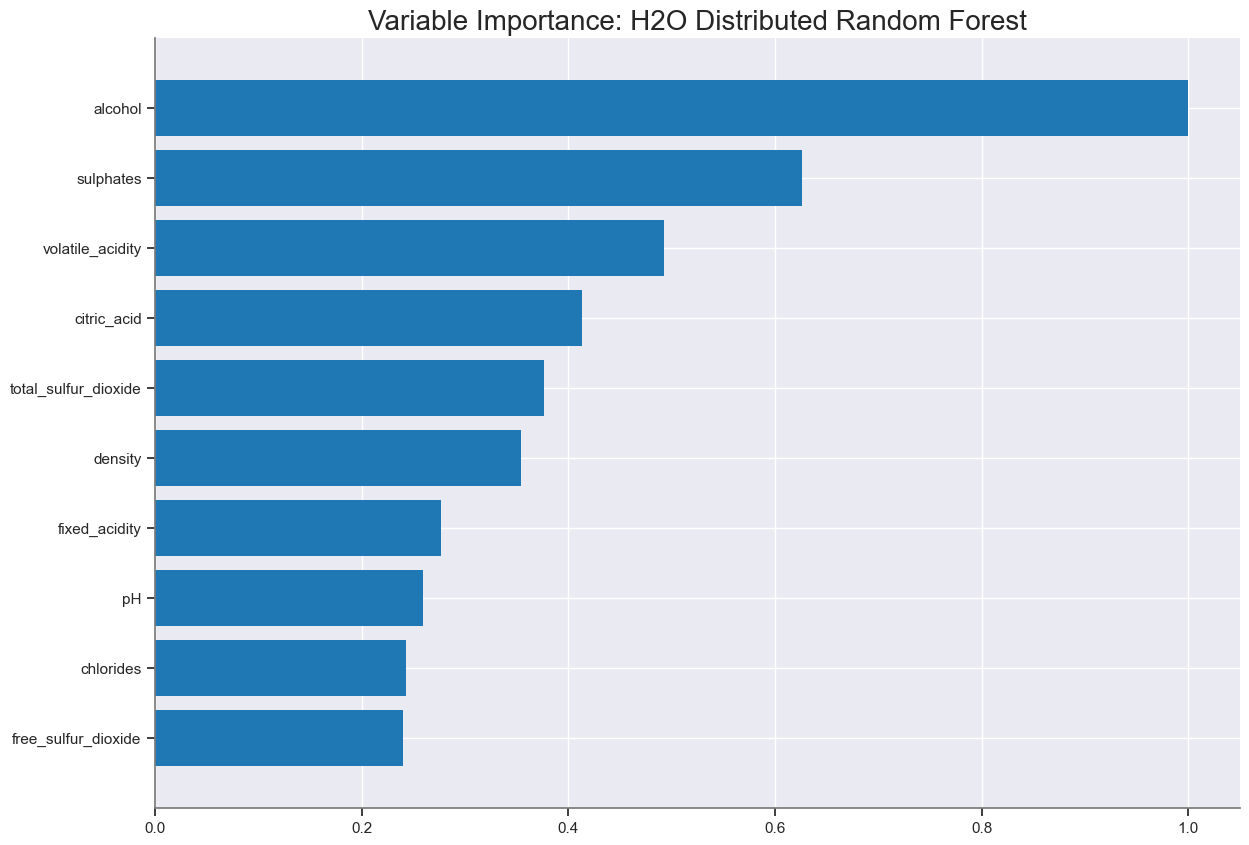

<Figure size 1600x800 with 0 Axes>

In [30]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model
- We can Interpret that Alcohol is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)
- Sulphate is 0.55 (Think as if it is 55% Important than Alcohol was)

And So On..

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Karan\AppData\Local\Temp\ipykernel_4156\537718518.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


42
glm


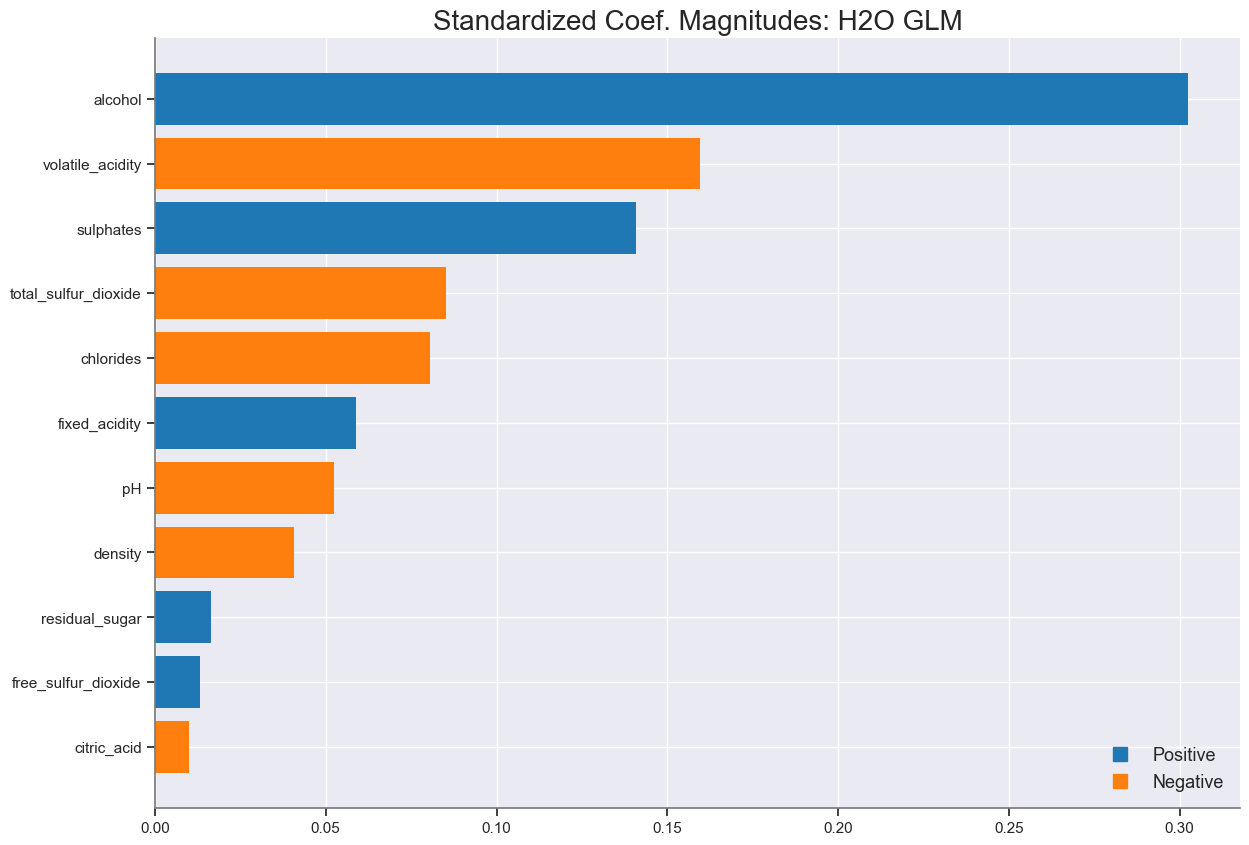

In [31]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

Standardized coefficient magnitudes (sometimes referred to as standardized coefficients or beta coefficients) are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage. 

The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable. A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

The exact interpretation of the values on standardized coefficient magnitudes depends on the specific model and the scale of the variables. In general, a magnitude value greater than 0.1 or 0.2 is often considered to be important in a predictive model. However, the exact threshold for importance may vary depending on the specific application and the context of the problem.


In [32]:
print(best_model.rmse(train=True))

0.6214176543209614


In [33]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [34]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.3157188490473574,
 'rmse': 0.561888644704053,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [35]:
predictions = best_model.predict(df_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [36]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

      predict
0    5.366667
1    5.033333
2    5.600000
3    5.800000
4    5.300000
..        ...
224  5.193590
225  5.933333
226  5.333333
227  5.566667
228  6.266667

[229 rows x 1 columns]


In [37]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

quality
0          5
1          5
2          5
3          4
4          5
..       ...
224        5
225        6
226        5
227        6
228        6

[229 rows x 1 columns]

In [38]:
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# Regularization
In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting. 
- Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

- Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

- Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

- The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

In [39]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

wine_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
wine_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
wine_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
wine_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.

- The first model, "wine_glm_regularization_ridge," is using Ridge regularization. The "family" argument is set to "gaussian," which means that the response variable is continuous and the model is using a normal (Gaussian) error distribution. The "alpha" argument is set to 0, which means that the model is using Ridge regularization. The "nfolds" argument is set to 5, which means that the model is using 5-fold cross-validation to evaluate the performance of the model.
- The second model, "wine_glm_regularization_lasso," is using Lasso regularization. The "family" and "nfolds" arguments are the same as in the Ridge model, but the "alpha" argument is set to 1, which means that the model is using Lasso regularization.
- This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.

In [40]:
wine_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676412165058_31


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              11                            11                             1                       py_2_sid_8b0d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.40868811992086396
RMSE: 0.6392871967440487
MAE: 0.4913067474640755
RMSLE: 0.09775726495039595
Mean Residual Deviance: 0.40868811992086396
R^2: 0.374456898178409
Null degrees of freedom: 913
Residual degrees of freedom: 902
Null deviance: 597.1466083151031
Residual deviance: 373.54094160766965
AIC: 1801.9697361793858

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.42114720084605517
RMSE: 0.6489585509460949
MAE: 0.4986177448931137
RMSLE: 0.09918290139260268
Mean Residual Deviance: 0.42114720084605517
R^2: 0.3553868744906653
Null degrees of freedom: 913
Residual degrees of freedom: 902
Null deviance: 598.9823611497497
Residual deviance: 384.9285415732944
AIC: 1829.4172440215602

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.497922   0.0251199   0.470576      0.479877      0.498187      0.505779      0.535189
mean_residual_deviance  0.420277   0.0458932   0.390442      0.366016      0.420235      0.439424      0.485267
mse                     0.420277   0.0458932   0.390442      0.366016      0.420235      0.439424      0.485267
null_deviance           119.796    8.33931     106.796       123.266       116.388       125.32        127.213
r2                      0.353063   0.0654628   0.370972      0.436853      0.342565      0.360051      0.254874
residual_deviance       76.9857    10.9836     67.1561       68.445        76.4828       78.2175       94.6271
rmse                    0.647521   0.035246    0.624854      0.604992      0.648255      0.662891      0.696611
rmsle                   0.0989606  0.00694411  0.0956511     0.0889945     0.099568      0.106294      0.104296

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  -----------------
    2023-02-14 17:07:01  0.000 sec   0             597.1466083151031          0.6533332694913601
    2023-02-14 17:07:01  0.004 sec   1                                                            0.6392871967440487  0.40868811992086396  0.4913067474640755  0.374456898178409

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
alcohol               0.336465               1                    0.334653
volatile_acidity      0.172084               0.511446             0.171157
sulphates             0.143907               0.427705             0.143133
total_sulfur_dioxide  0.0861671              0.256096             0.0857032
chlorides             0.082431               0.244992             0.0819872
pH                    0.0729698              0.216872             0.072577
fixed_acidity         0.0441175              0.131121             0.04388
citric_acid           0.0331855              0.0986301            0.0330069
free_sulfur_dioxide   0.016087               0.04

# Ridge Regularization

In [41]:
wine_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676412165058_32


GLM Model: summary
    family    link      regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 4.063E-4 )  11                            11                             1                       py_2_sid_8b0d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.4086881868568402
RMSE: 0.6392872490960853
MAE: 0.4913198682832637
RMSLE: 0.09775742016601531
Mean Residual Deviance: 0.4086881868568402
R^2: 0.37445679572537405
Null degrees of freedom: 913
Residual degrees of freedom: 902
Null deviance: 597.1466083151031
Residual deviance: 373.54100278715197
AIC: 1801.9698858766105

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.4289570409928744
RMSE: 0.6549481208407841
MAE: 0.5021312324150523
RMSLE: 0.09996650336141825
Mean Residual Deviance: 0.4289570409928744
R^2: 0.34343303636315115
Null degrees of freedom: 913
Residual degrees of freedom: 902
Null deviance: 597.7648042749386
Residual deviance: 392.0667354674872
AIC: 1846.2114073089765

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.502187   0.020237    0.512177      0.508898      0.525671      0.473898      0.490291
mean_residual_deviance  0.429069   0.0392092   0.479304      0.421059      0.455531      0.378873      0.41058
mse                     0.429069   0.0392092   0.479304      0.421059      0.455531      0.378873      0.41058
null_deviance           119.553    18.0372     135.33        131.504       96.4556       103.721       130.755
r2                      0.330923   0.11852     0.363715      0.428054      0.126286      0.345793      0.390767
residual_deviance       78.4133    7.37775     85.7954       74.5275       84.2732       67.8182       79.6525
rmse                    0.654486   0.0299443   0.692318      0.648891      0.67493       0.615526      0.640765
rmsle                   0.0999257  0.00426069  0.106502      0.0996902     0.100677      0.0950392     0.0977196

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  -------------------
    2023-02-14 17:07:02  0.000 sec   0             597.1466083151031          0.6533332694913601
    2023-02-14 17:07:02  0.002 sec   1                                                            0.6392872490960853  0.4086881868568402   0.4913198682832637  0.37445679572537405

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
alcohol               0.336075               1                    0.334342
volatile_acidity      0.171955               0.511657             0.171068
sulphates             0.143906               0.428195             0.143163
total_sulfur_dioxide  0.0861613              0.256375             0.0857169
chlorides             0.0824145              0.245227             0.0819894
pH                    0.072703               0.21633              0.072328
fixed_acidity         0.044391               0.132087             0.044162
citric_acid           0.03296                0.0980733            0.03279
free_sulfur_dio

The regularization appears to have helped in reducing the cross-validation metrics. 
- The mean squared error (Improved by 0.468%), 
- root mean squared error (Improved by 0.234%), 
- mean absolute error(Improved by 0.298%), 
and root mean squared logarithmic error are all lower in the model with regularization compared to the model without regularization. Additionally, the residual deviance and AIC are also lower in the model with regularization. The R-squared value is slightly higher in the model with regularization, which means that the regularization helped the model to better generalize to new data.

# Lasso Regularization

In [42]:
wine_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676412165058_33


GLM Model: summary
    family    link      regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 4.063E-4 )  11                            11                             1                       py_2_sid_8b0d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.4086932027562398
RMSE: 0.6392911721244395
MAE: 0.49143882666856703
RMSLE: 0.09775785433671363
Mean Residual Deviance: 0.4086932027562398
R^2: 0.37444911832758365
Null degrees of freedom: 913
Residual degrees of freedom: 902
Null deviance: 597.1466083151031
Residual deviance: 373.5455873192032
AIC: 1801.9811034847173

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.42313259742001247
RMSE: 0.6504864313880901
MAE: 0.4980715837377343
RMSLE: 0.09937465345473993
Mean Residual Deviance: 0.42313259742001247
R^2: 0.3523480018866373
Null degrees of freedom: 913
Residual degrees of freedom: 902
Null deviance: 598.6044867725228
Residual deviance: 386.7431940418914
AIC: 1833.7159511973523

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.498953   0.023749    0.490694      0.508318      0.533851      0.491774      0.47013
mean_residual_deviance  0.424358   0.0415001   0.415367      0.41252       0.491753      0.423902      0.378251
mse                     0.424358   0.0415001   0.415367      0.41252       0.491753      0.423902      0.378251
null_deviance           119.721    4.21729     123.669       114.828       118.384       124.552       117.172
r2                      0.349473   0.0386612   0.365542      0.368327      0.28038       0.368501      0.364612
residual_deviance       77.3486    5.19952     78.0889       71.7784       85.0732       78.4219       73.3808
rmse                    0.650823   0.0313764   0.644489      0.642277      0.701251      0.651078      0.615021
rmsle                   0.0994088  0.00319904  0.0989525     0.0973104     0.104548      0.0999284     0.0963043

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  -------------------  -------------------
    2023-02-14 17:07:02  0.000 sec   0             597.1466083151031          0.6533332694913601
    2023-02-14 17:07:02  0.002 sec   1                                                            0.6392911721244395  0.4086932027562398   0.49143882666856703  0.37444911832758365

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
alcohol               0.337613               1                    0.33989
volatile_acidity      0.171511               0.508011             0.172668
sulphates             0.142949               0.423411             0.143913
total_sulfur_dioxide  0.0855207              0.25331              0.0860975
chlorides             0.0822806              0.243713             0.0828356
pH                    0.0734346              0.217511             0.0739299
fixed_acidity         0.040361               0.119548             0.0406332
citric_acid           0.030988               0.0917857            0.031197
free_sulfur

# Which Regularization Method Helps ?

- The Lasso regularization appears to have increased the MSE, RMSE, MAE, and RMSLE values compared to the non-regularized and Ridge regularized models, indicating worse performance. The R-squared value also decreased, indicating a worse fit to the data.

- So based on these metrics, it seems that Lasso did not help in this case and performed worse than Ridge. However, it's always a good practice to try multiple regularization techniques and compare their performance using different metrics, as the optimal regularization method can depend on the specific dataset and modeling task.

- Here, we can observe that after applying the ridge regularization, there is a slight improvement in the evaluation metrics on the cross validation data, hence it can be concluded that Ridge regularization helps us avoid the overfitting of model and improvements of metrics on the validation dataset.

In [43]:
lambda_search = wine_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [44]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676412165058_34


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.003685 )  nlambda = 100, lambda.max = 0.8127, lambda.min = 0.003685, lambda.1se = -1.0  11                            10                             59                      py_2_sid_8b0d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.40878783831595855
RMSE: 0.6393651838471959
MAE: 0.4919898541610816
RMSLE: 0.09776978916358661
Mean Residual Deviance: 0.40878783831595855
R^2: 0.37430426796692107
Null degrees of freedom: 913
Residual degrees of freedom: 903
Null deviance: 597.1466083151031
Residual deviance: 373.6320842207861
AIC: 1800.1927216082543

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse       training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  ------------------  -------------------  ------------------  -------------------
     2023-02-14 17:07:02  0.000 sec   1            .81E0     1             0.6533332694913556   0.5
     2023-02-14 17:07:02  0.001 sec   2            .74E0     2             0.6326017923680964   0.5
     2023-02-14 17:07:02  0.002 sec   3            .67E0     2             0.6140396557632491   0.5
     2023-02-14 17:07:02  0.003 sec   4            .61E0     2             0.5975029427395773   0.5
     2023-02-14 17:07:02  0.004 sec   5            .56E0     3             0.5793228659843744   0.5
     2023-02-14 17:07:02  0.004 sec   6            .51E0     3             0.5590491395124889   0.5
     2023-02-14 17:07:02  0.005 sec   7            .47E0     3             0.541380324451296    0.5
     2023-02-14 17:07:02  0.005 sec   8            .42E0     3             0.5260373717407417   0.5
     2023-02-14 17:07:02  0.006 sec   9            .39E0     3             0.5127592609250925   0.5
     2023-02-14 17:07:02  0.007 sec   10           .35E0     3             0.5013045919194686   0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                 ---                  ---                 ---
     2023-02-14 17:07:02  0.030 sec   50           .85E-2    10            0.40913941400057785  0.5
     2023-02-14 17:07:02  0.031 sec   51           .78E-2    10            0.40906961099034894  0.5
     2023-02-14 17:07:02  0.031 sec   52           .71E-2    11            0.4090092678546228   0.5
     2023-02-14 17:07:02  0.032 sec   53           .64E-2    11            0.40895785862909495  0.5
     2023-02-14 17:07:02  0.032 sec   54           .59E-2    11            0.40891513385773354  0.5
     2023-02-14 17:07:02  0.032 sec   55           .53E-2    11            0.40887939631246284  0.5
     2023-02-14 17:07:02  0.032 sec   56           .49E-2    11            0.4088503141922775   0.5
     2023-02-14 17:07:02  0.033 sec   57           .44E-2    11            0.40882557770233746  0.5
     2023-02-14 17:07:02  0.033 sec   58           .4E-2     11            0.40880495131329136  0.5
     2023-02-14 17:07:02  0.033 sec   59           .37E-2    11            0.40878783831596643  0.5      59            0.6393651838471959  0.40878783831595855  0.4919898541610816  0.37430426796692107
[59 rows x 13 

Above  parameters are from a lambda search, which means that the model was trained on a range of different values of the regularization parameter lambda to find the value that minimized the selected loss function. Based on the reported metrics, it seems that the optimal value of lambda resulted in a slightly improved model compared to the non-regularized model. The MSE, RMSE, and MAE all decreased slightly, indicating that the model is making slightly more accurate predictions on the training data. The R^2 value, which measures how well the model fits the data, decreased slightly, which may indicate that the model is not overfitting the training data as much. Overall, the lambda search seems to have resulted in a slightly improved model.

- MSE improved from 0.4234393816333662 to 0.42185125944877285, or by 0.375%
- RMSE improved from 0.6507222000465069 to 0.6493051832461667, or by 0.218%
- MAE improved from 0.5049750807378458 to 0.5035142349852977, or by 0.290%
- RMSLE improved from 0.09927527847388463 to 0.09893003268921823, or by 0.348%
- R-squared improved from 0.358097238638058 to 0.3603008092769123, or by 0.616%


Here we can observe that regularization helps a bit in reducing the overfitting of our GLM model. 

In [45]:
coeff_table = wine_glm._model_json["output"]["coefficients_table"]

In [46]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  std_error   z_value       p_value  \
0              Intercept      9.201569  27.815211  0.330811  7.408643e-01   
1          fixed_acidity      0.025743   0.033761  0.762525  4.459463e-01   
2       volatile_acidity     -0.950989   0.159971 -5.944768  3.953739e-09   
3            citric_acid     -0.167284   0.197915 -0.845231  3.982061e-01   
4         residual_sugar      0.005588   0.019986  0.279586  7.798590e-01   
5              chlorides     -1.793857   0.567557 -3.160662  1.626622e-03   
6    free_sulfur_dioxide      0.001575   0.002858  0.550978  5.817849e-01   
7   total_sulfur_dioxide     -0.002632   0.000943 -2.792823  5.335604e-03   
8                density     -5.250486  28.383357 -0.184985  8.532826e-01   
9                     pH     -0.472461   0.247969 -1.905318  5.705647e-02   
10             sulphates      0.848841   0.150629  5.635324  2.335610e-08   
11               alcohol      0.312178   0.034965  8.928249  2.383208e-18   

    standardized_coefficients  
0                    5.645514  
1                    0.044118  
2                   -0.172084  
3                   -0.033186  
4                    0.007912  
5                   -0.082431  
6                    0.016087  
7                   -0.086167  
8                   -0.010087  
9                   -0.072970  
10                   0.143907  
11                   0.336465

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                              rmse       mse       mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
----------------------------------------------------------------  --------  --------  --------  ---------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_6_AutoML_1_20230214_170318              0.55382   0.306717  0.425128  0.0857589                  0.306717                 354                   0.054919  StackedEnsemble
StackedEnsemble_Best1000_1_AutoML_1_20230214_170318               0.557405  0.3107    0.428893  0.086116                   0.3107                   204                   0.053151  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230214_170318              0.557887  0.311238  0.42536   0.086169                   0.311238                 144                   0.019805  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230214_170318           0.557911  0.311264  0.425421  0.0861662                  0.311264                 131                   0.014106  StackedEnsemble
StackedEnsemble_BestOfFamily_6_AutoML_1_20230214_170318           0.557955  0.311314  0.428779  0.0861808                  0.311314                 351                   0.018295  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230214_170318              0.55804   0.311408  0.424529  0.0862381                  0.311408                 130                   0.04429   StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20230214_170318              0.558322  0.311724  0.428512  0.0863096                  0.311724                 211                   0.060065  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230214_170318              0.558322  0.311724  0.428512  0.0863096                  0.311724                 146                   0.047406  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20230214_170318           0.558695  0.312141  0.424925  0.0863397                  0.312141                 126                   0.018651  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230214_170318           0.558717  0.312165  0.424912  0.086338                   0.312165                 144                   0.028973  StackedEnsemble
GBM_grid_1_AutoML_1_20230214_170318_model_8                       0.559539  0.313084  0.404898  0.0870159                  0.313084                 268                   0.015436  GBM
DRF_1_AutoML_1_20230214_170318                                    0.561889  0.315719  0.431729  0.0869182                  0.315719                 196                   0.009952  DRF
GBM_lr_annealing_selection_AutoML_1_20230214_170318_select_model  0.565853  0.320189  0.438019  0.0874603                  0.320189                 201                   0.00829   GBM
GBM_grid_1_AutoML_1_20230214_170318_model_28                      0.568427  0.32311   0.435689  0.088262                   0.32311                  145                   0.012874  GBM
GBM_grid_1_AutoML_1_20230214_170318_model_31                      0.572019  0.327206  0.43064   0.0885153                  0.327206                 181                   0.013381  GBM
XRT_1_AutoML_1_20230214_170318                                    0.5736    0.329016  0.435969  0.0891463                  0.329016                 217                   0.012351  DRF
GBM_grid_1_AutoML_1_20230214_170318_model_5                       0.574079  0.329567  0.43889   0.0887758                  0.329567                 233                   0.007465  GBM
GBM_grid_1_AutoML_1_20230214_170318_model_13                      0.57552   0.331224  0.421757  0.0896999                  0.331224                 216                   0.011156  GBM
GBM_2_AutoML_1_20230214_170318                                    0.577315  0.333293  0.446865  0.0892535                  0.333293                  89                   0.006968  GBM
GBM

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

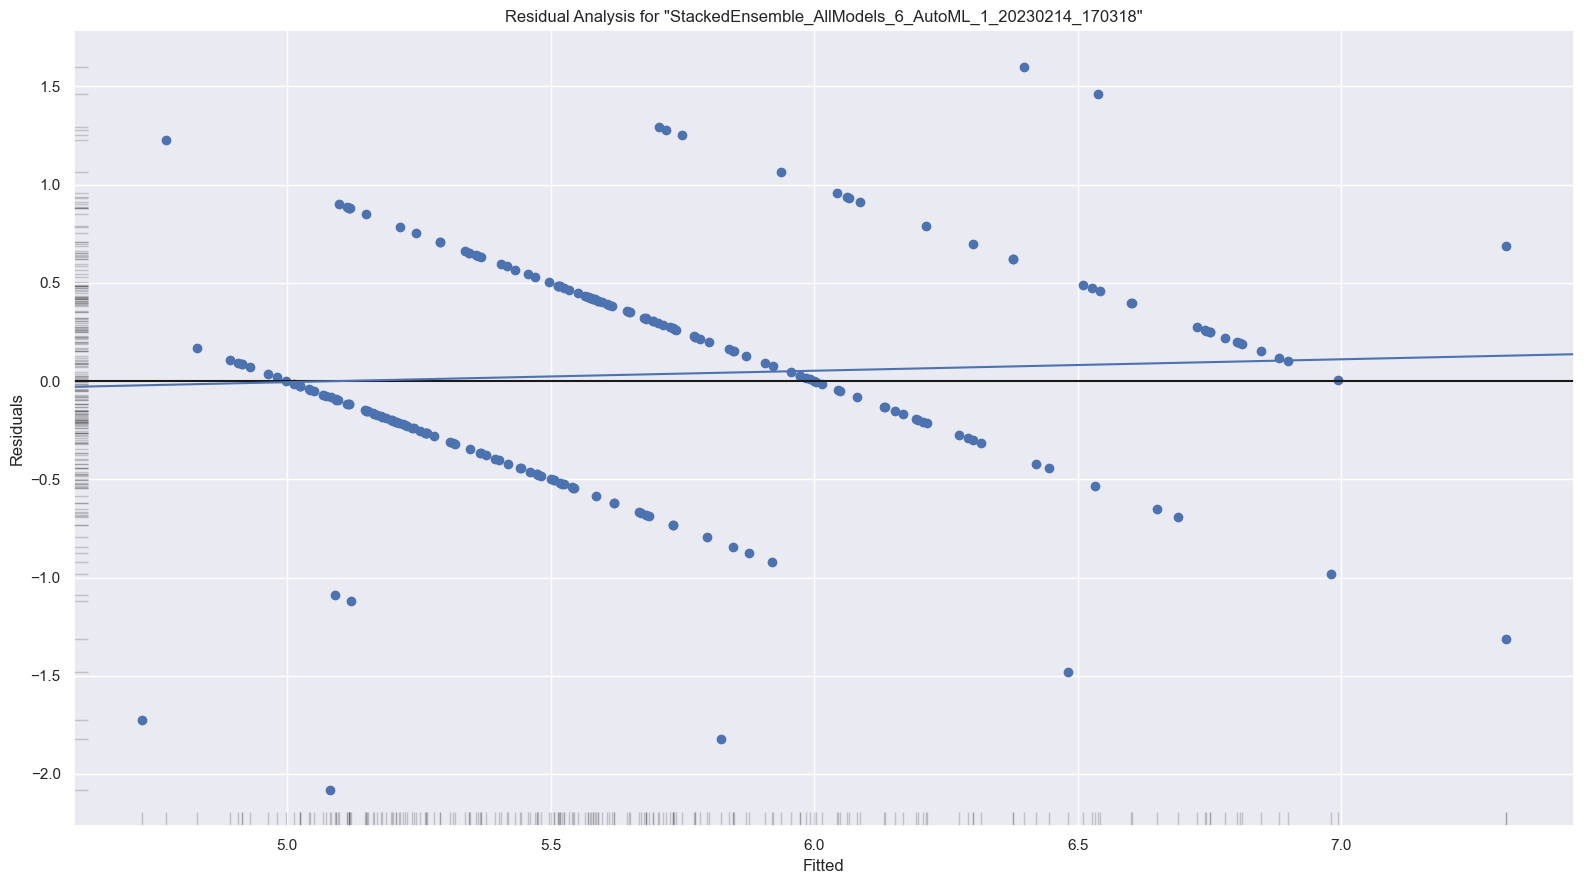

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

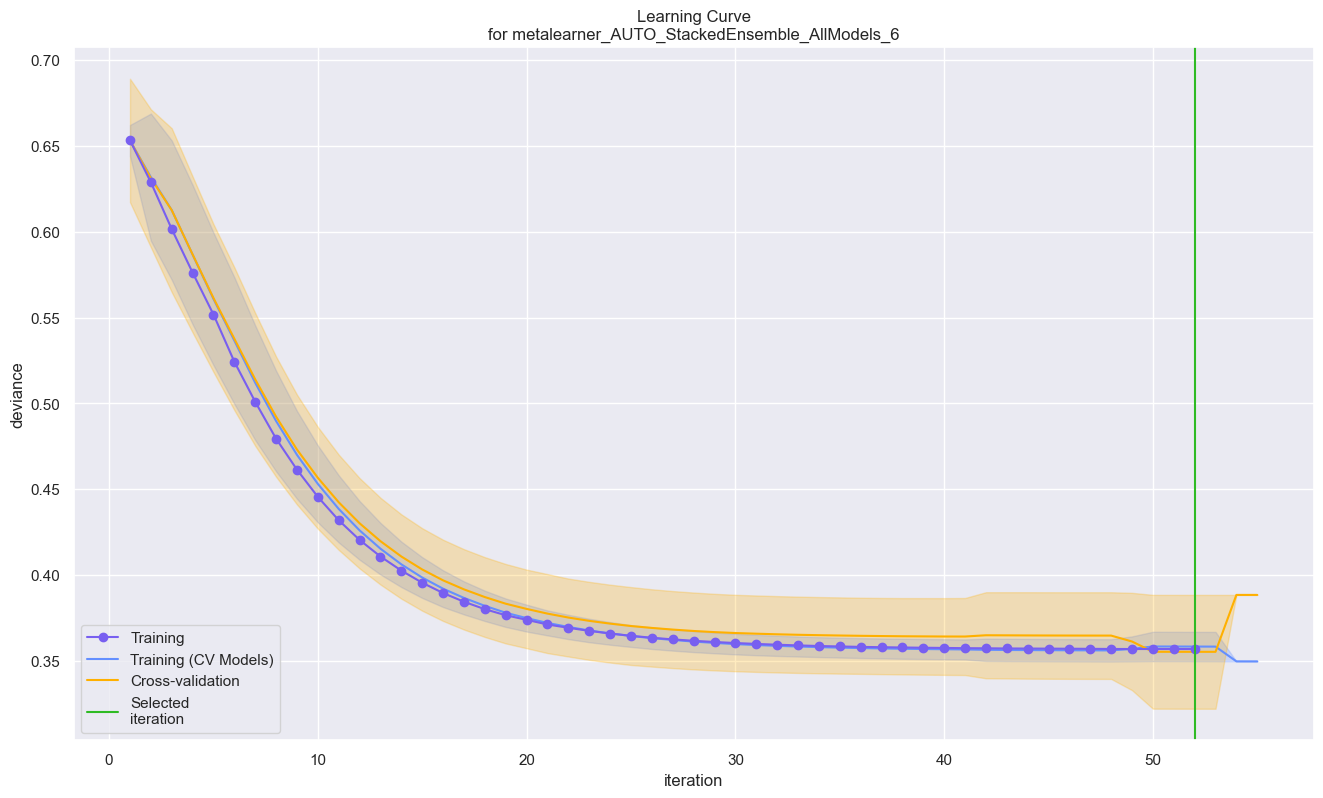

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

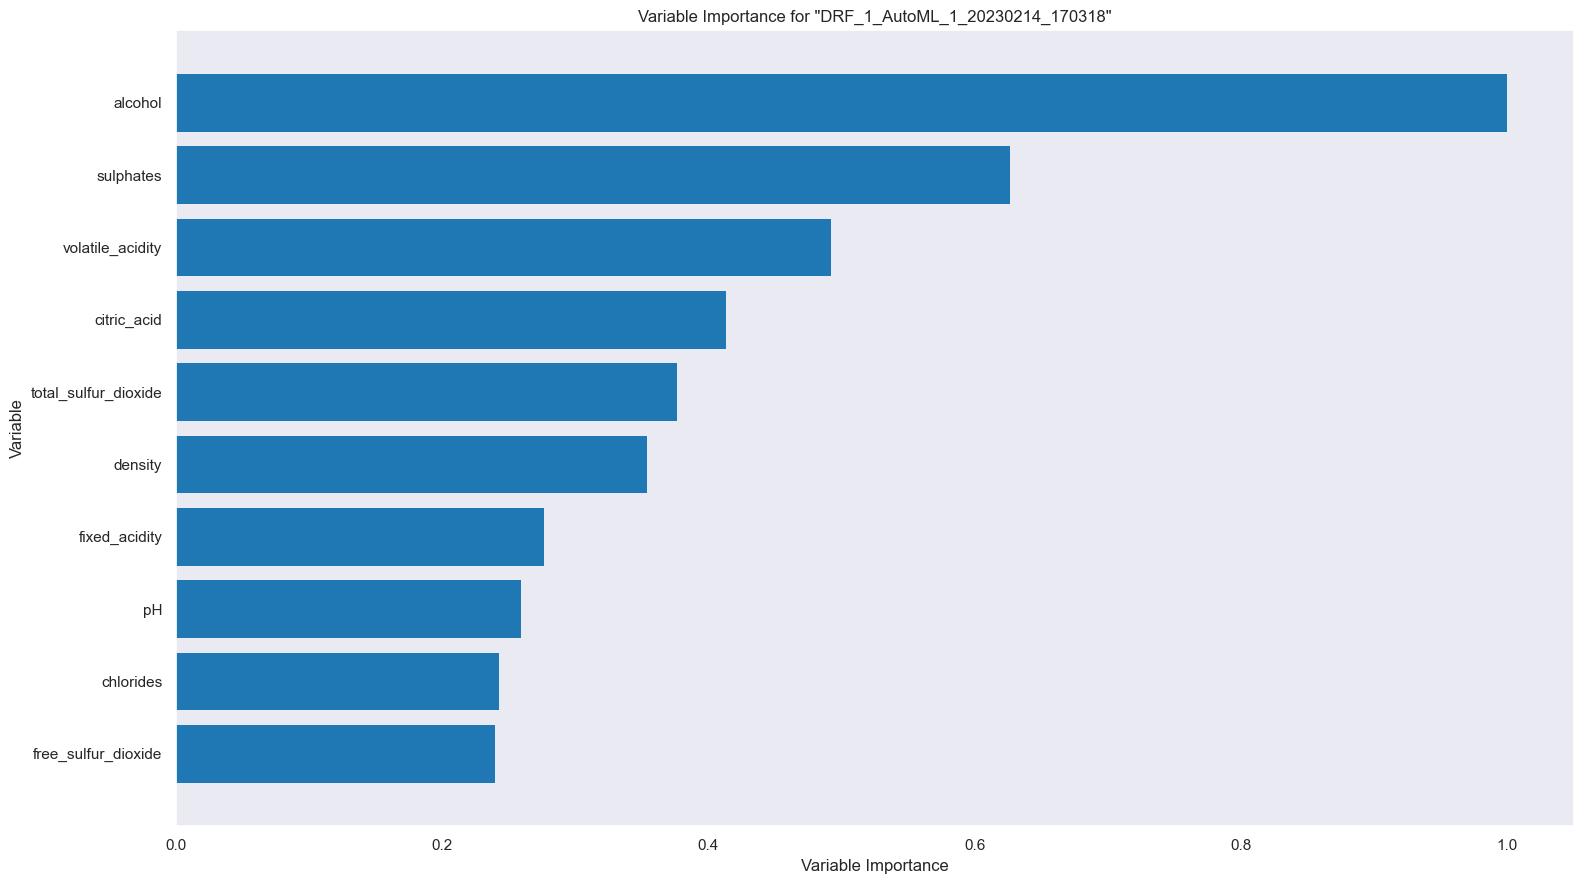

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

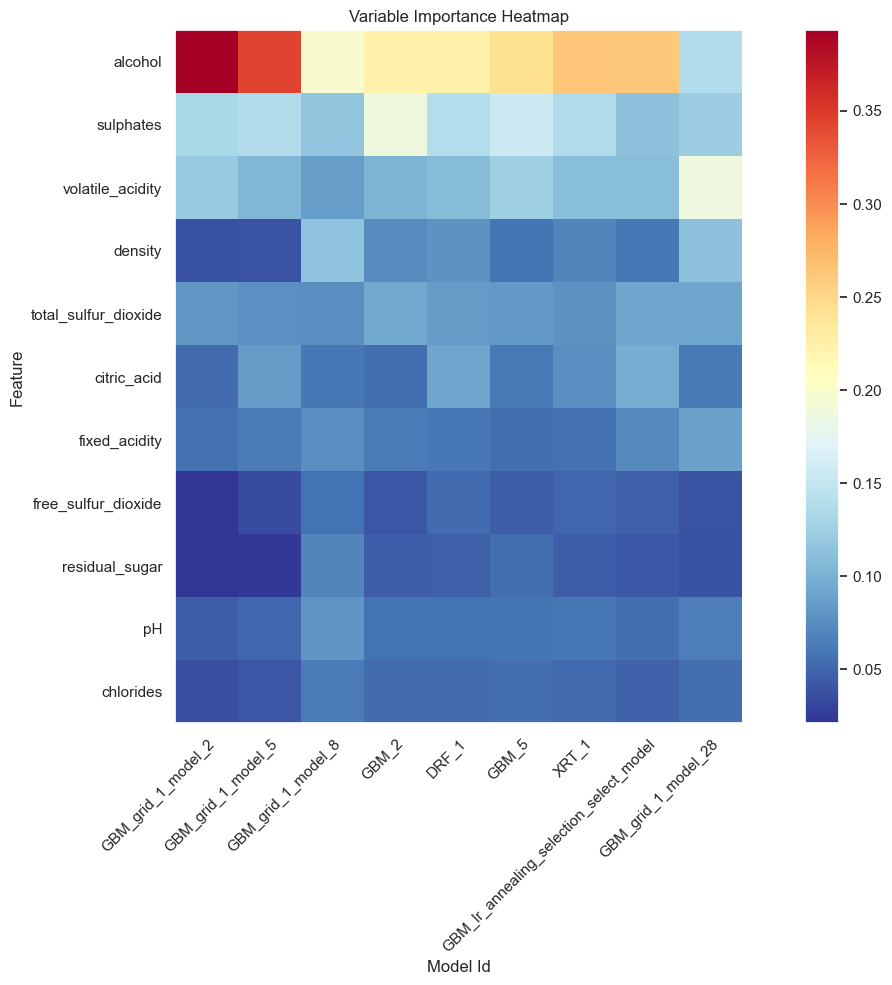

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

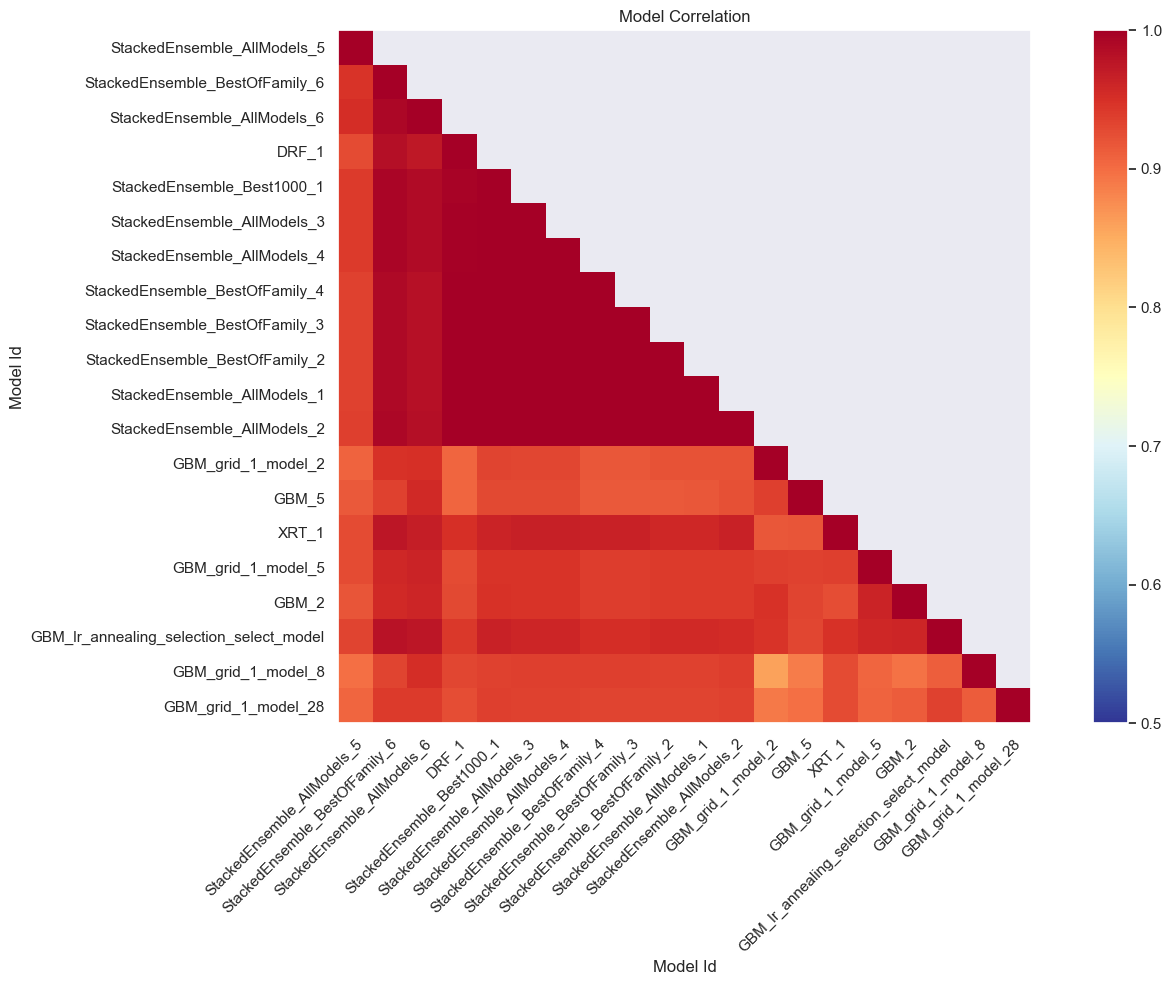

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

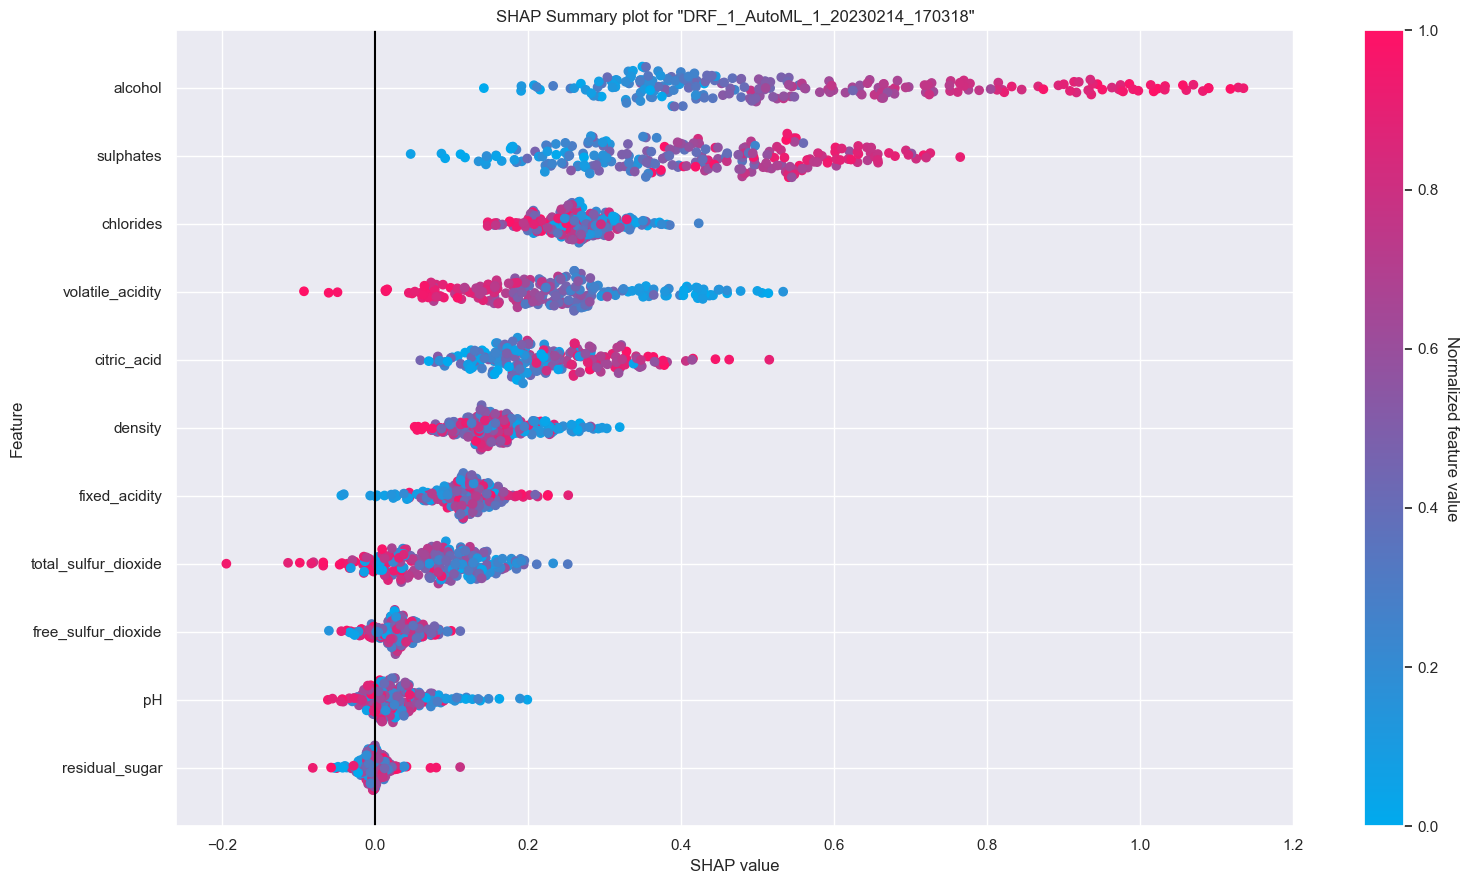

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

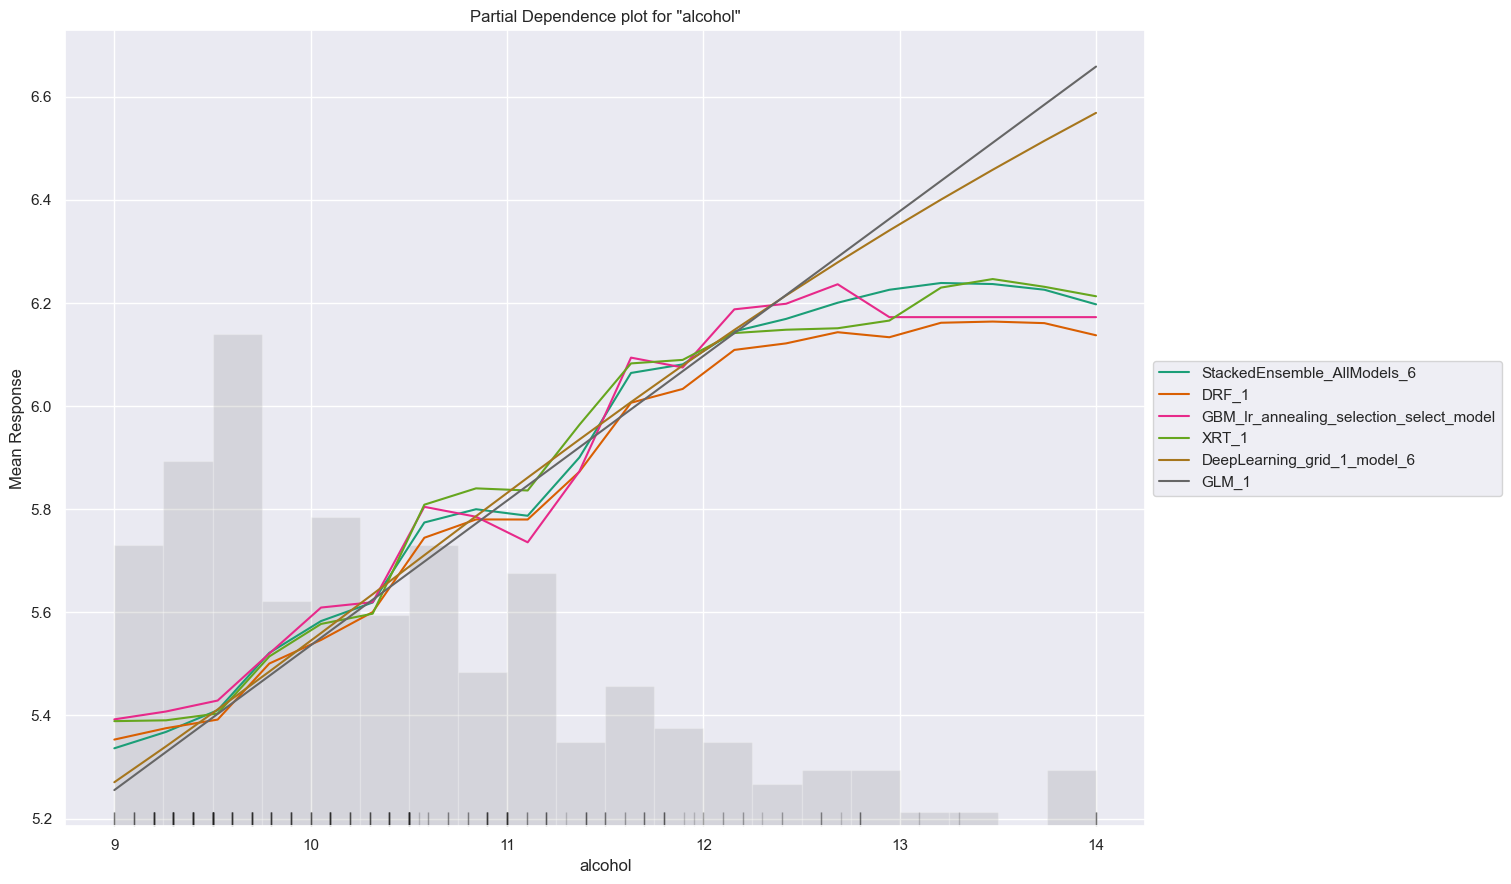

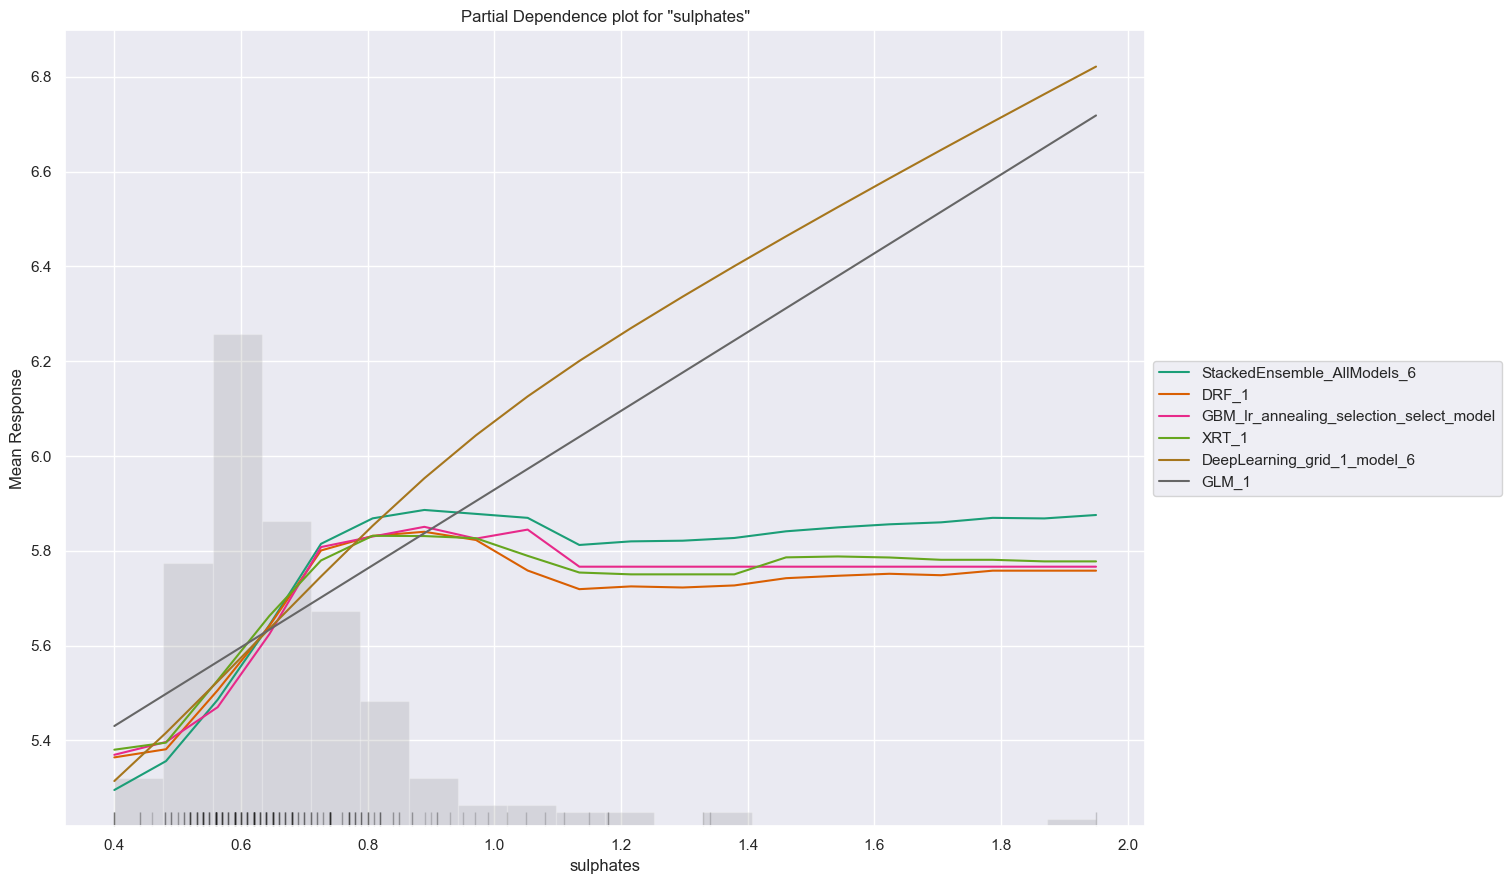

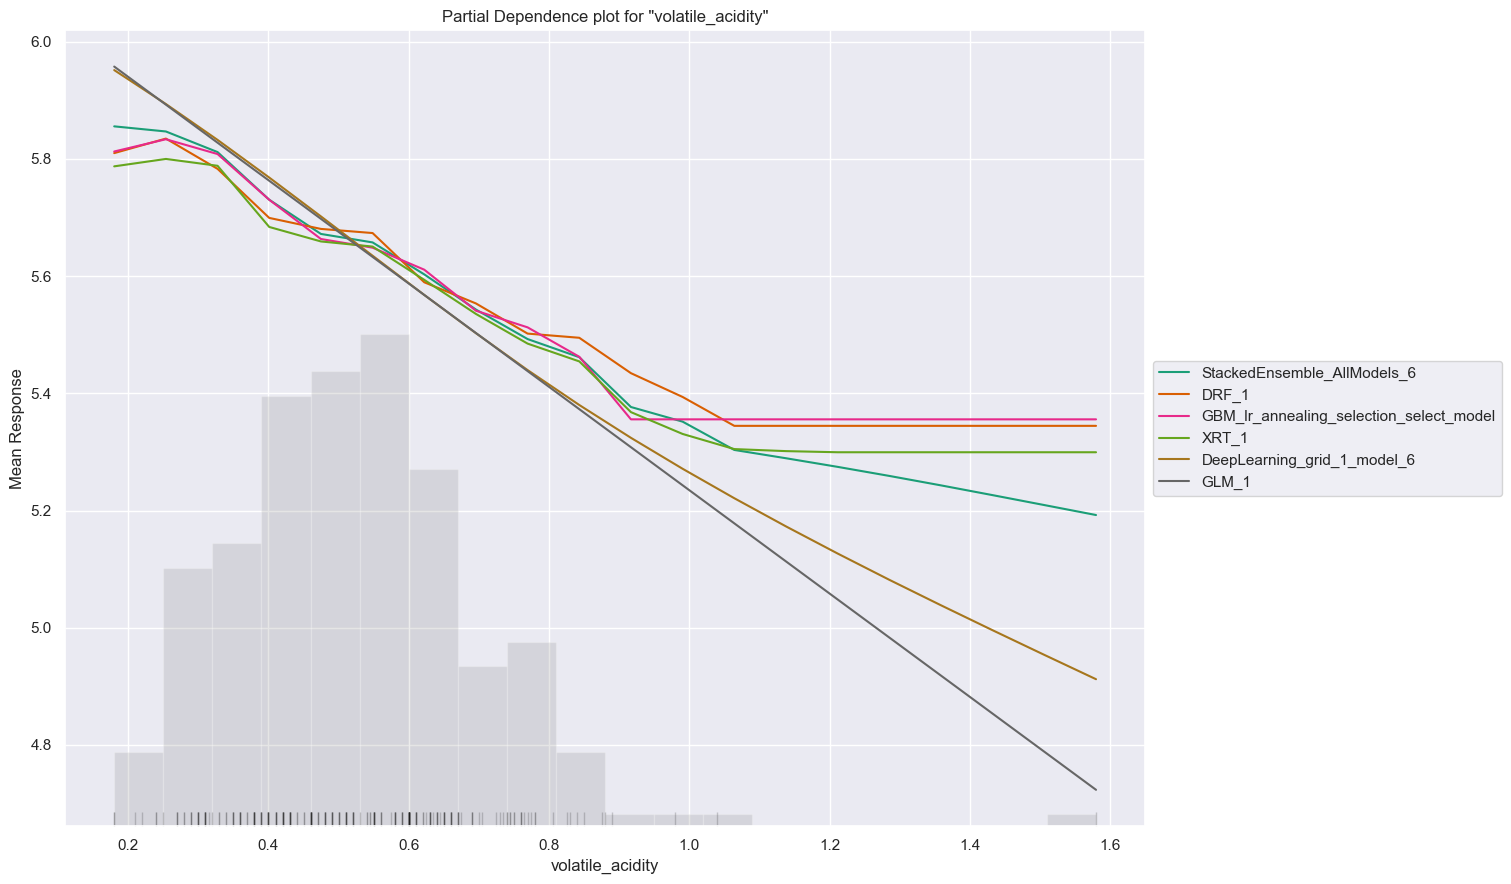

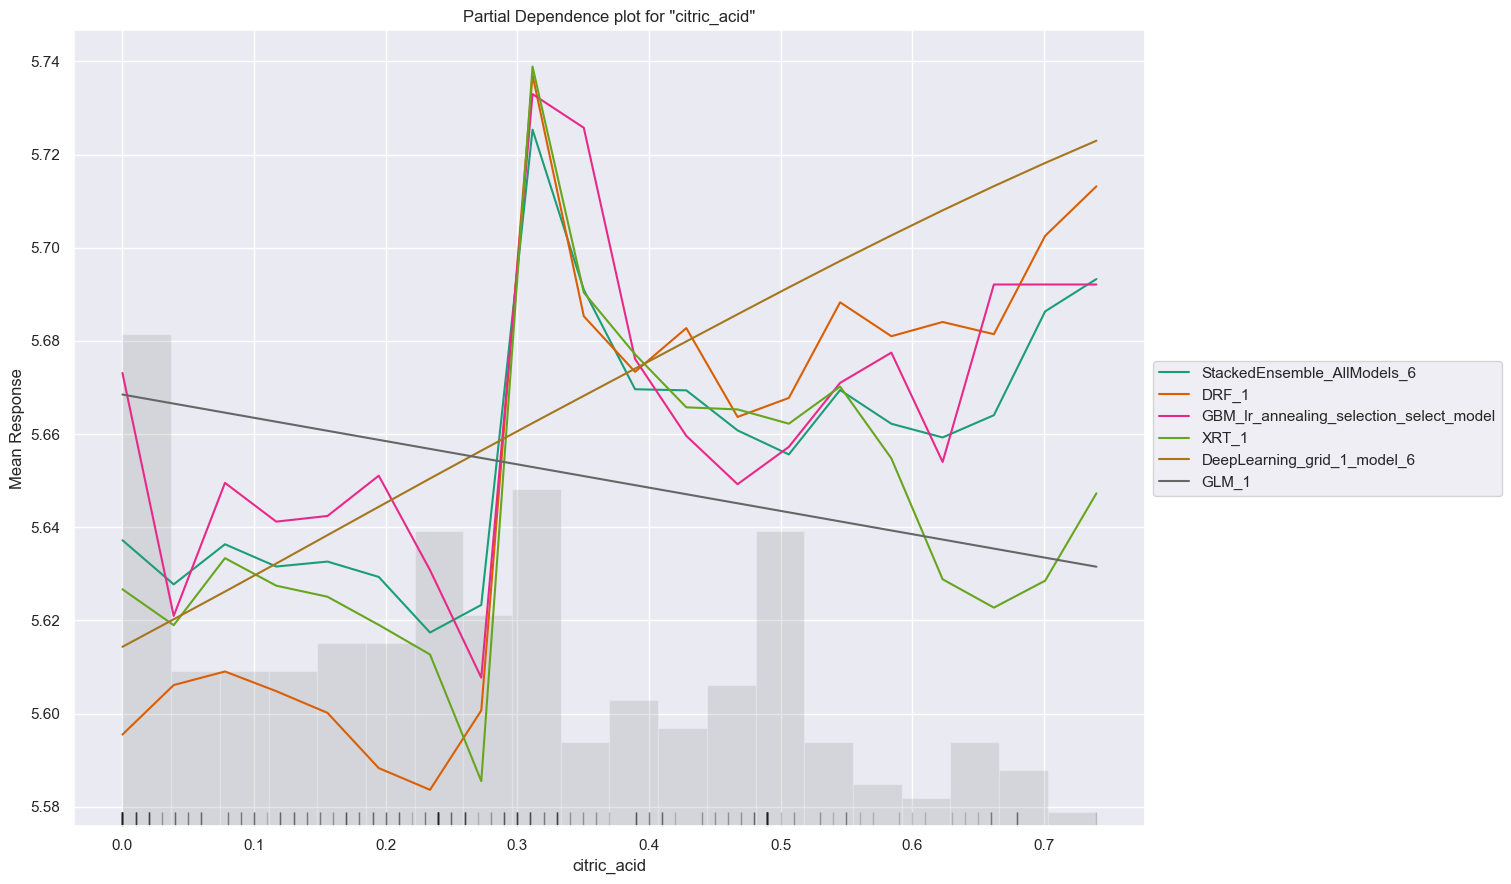

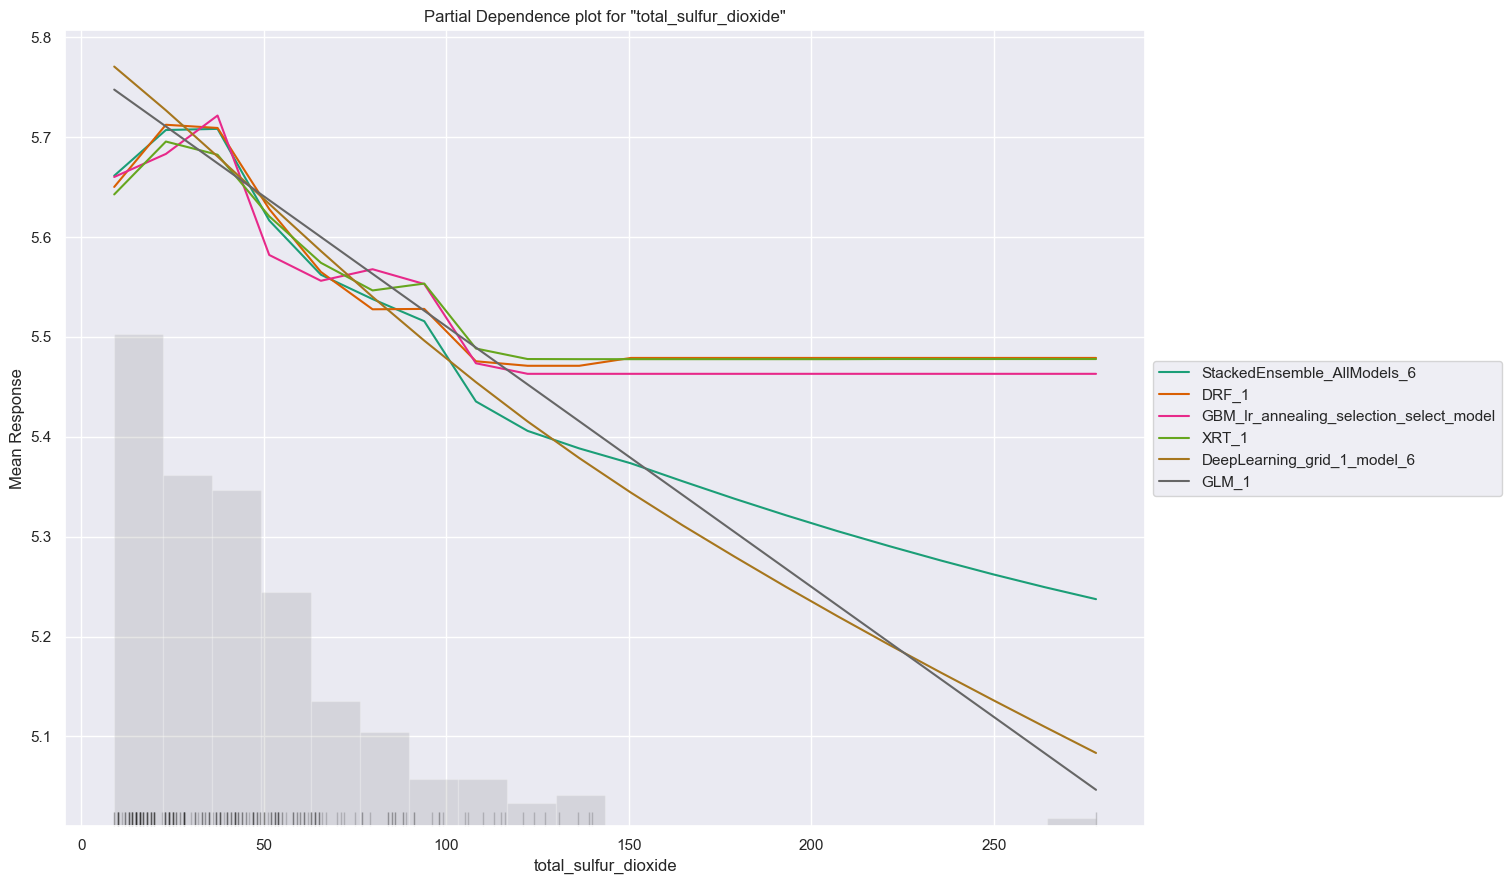

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

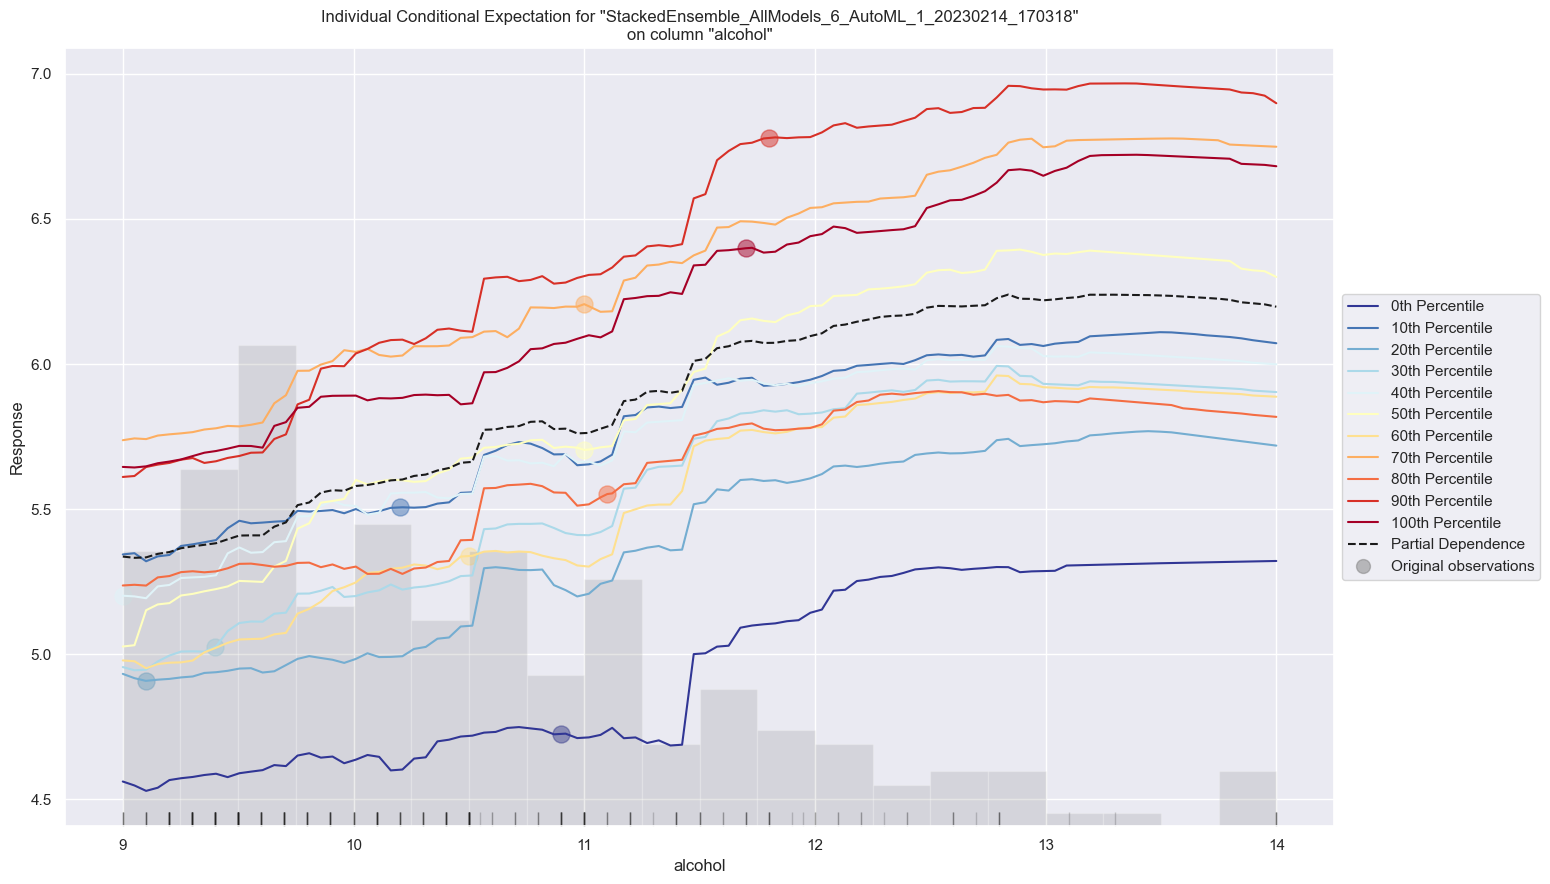

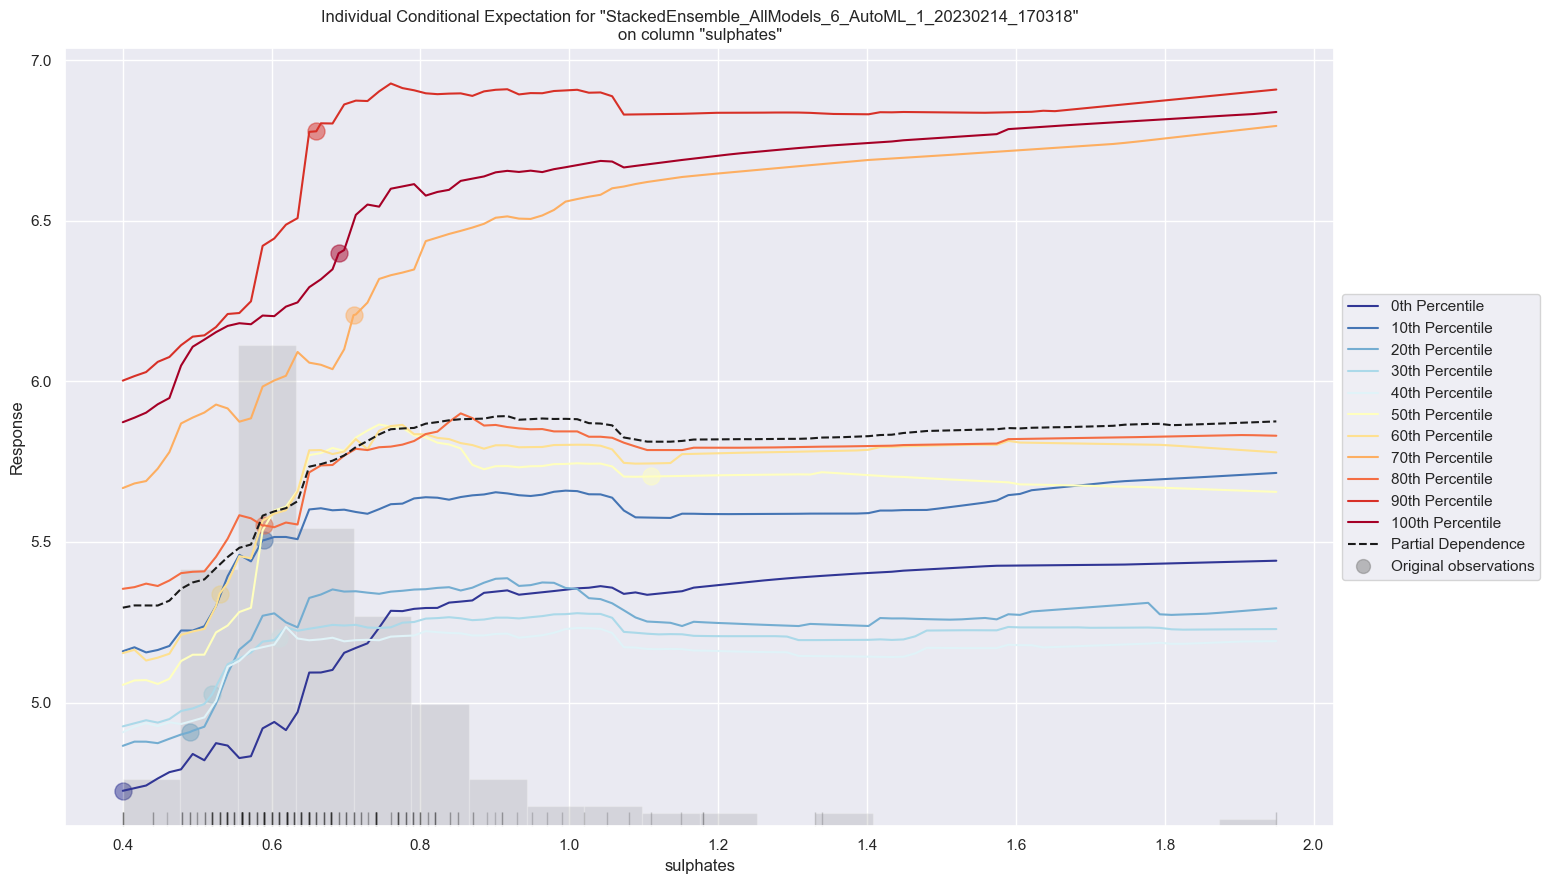

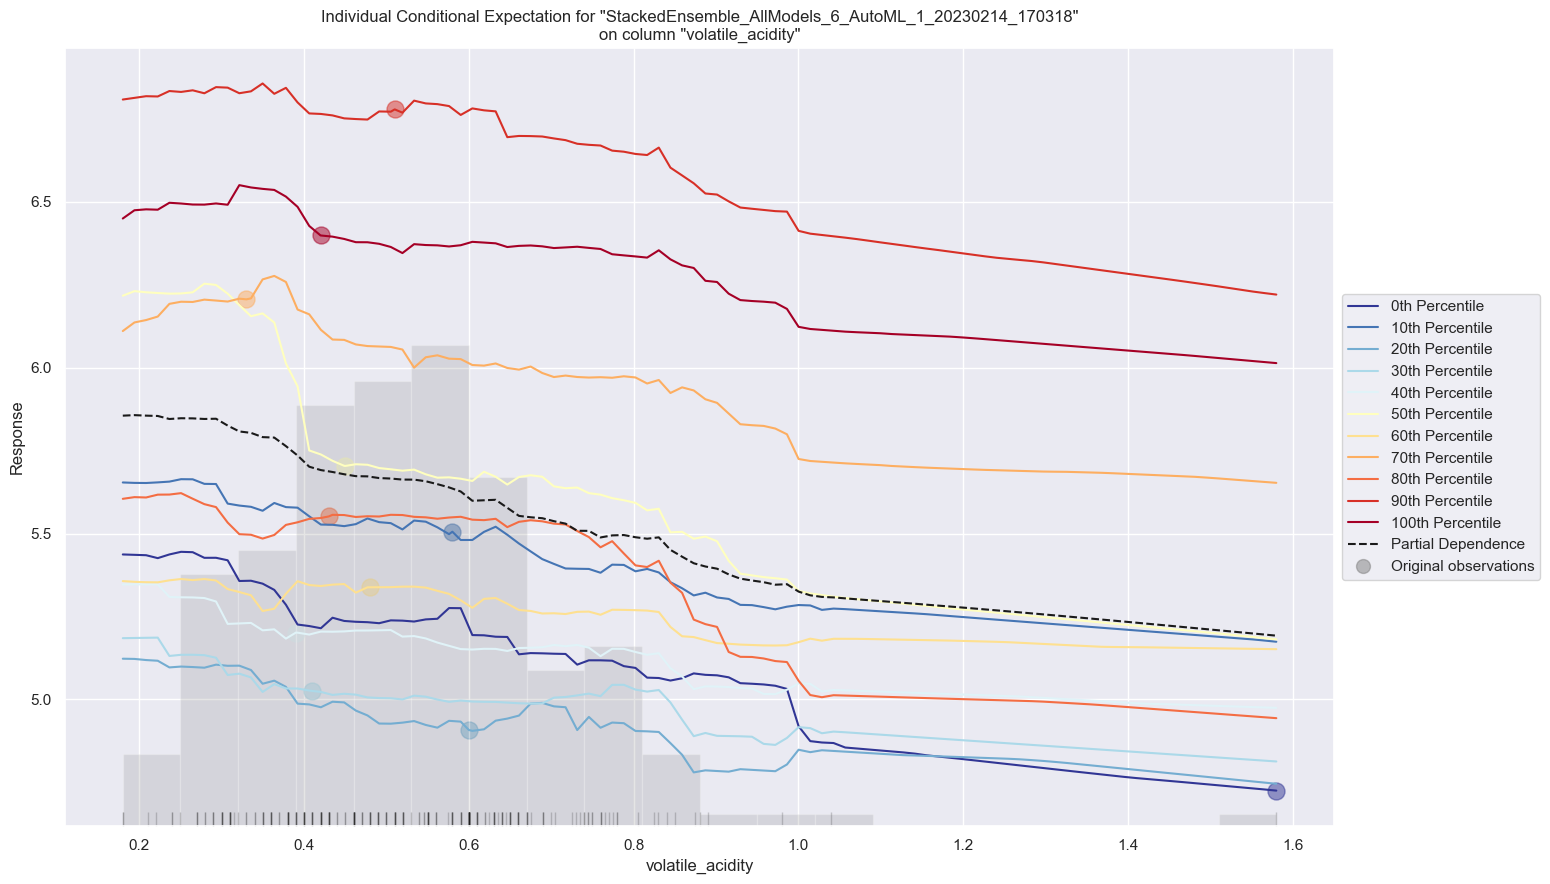

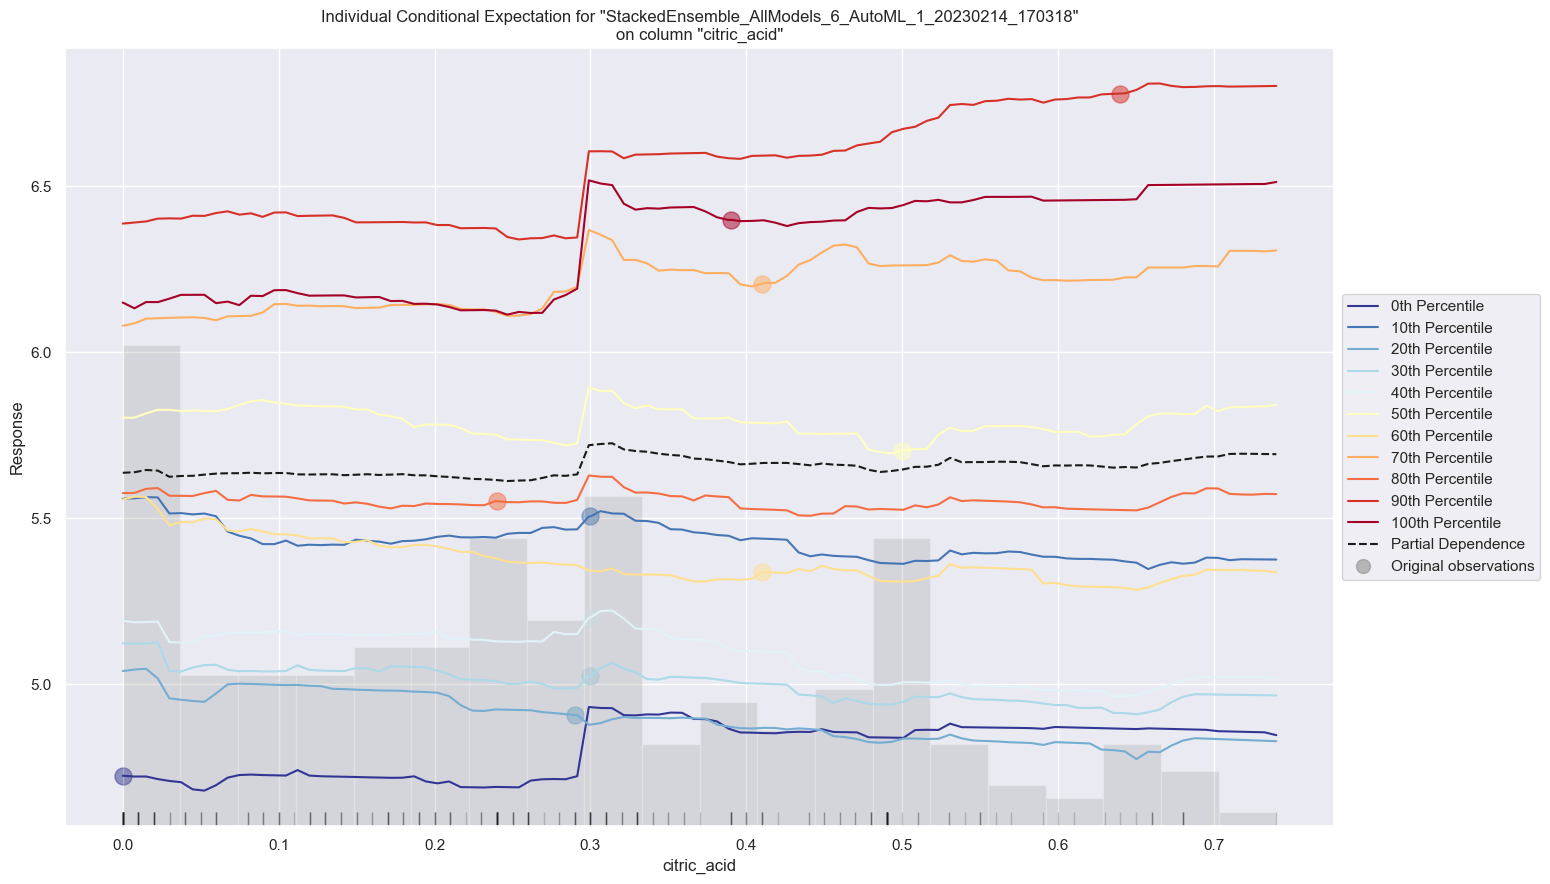

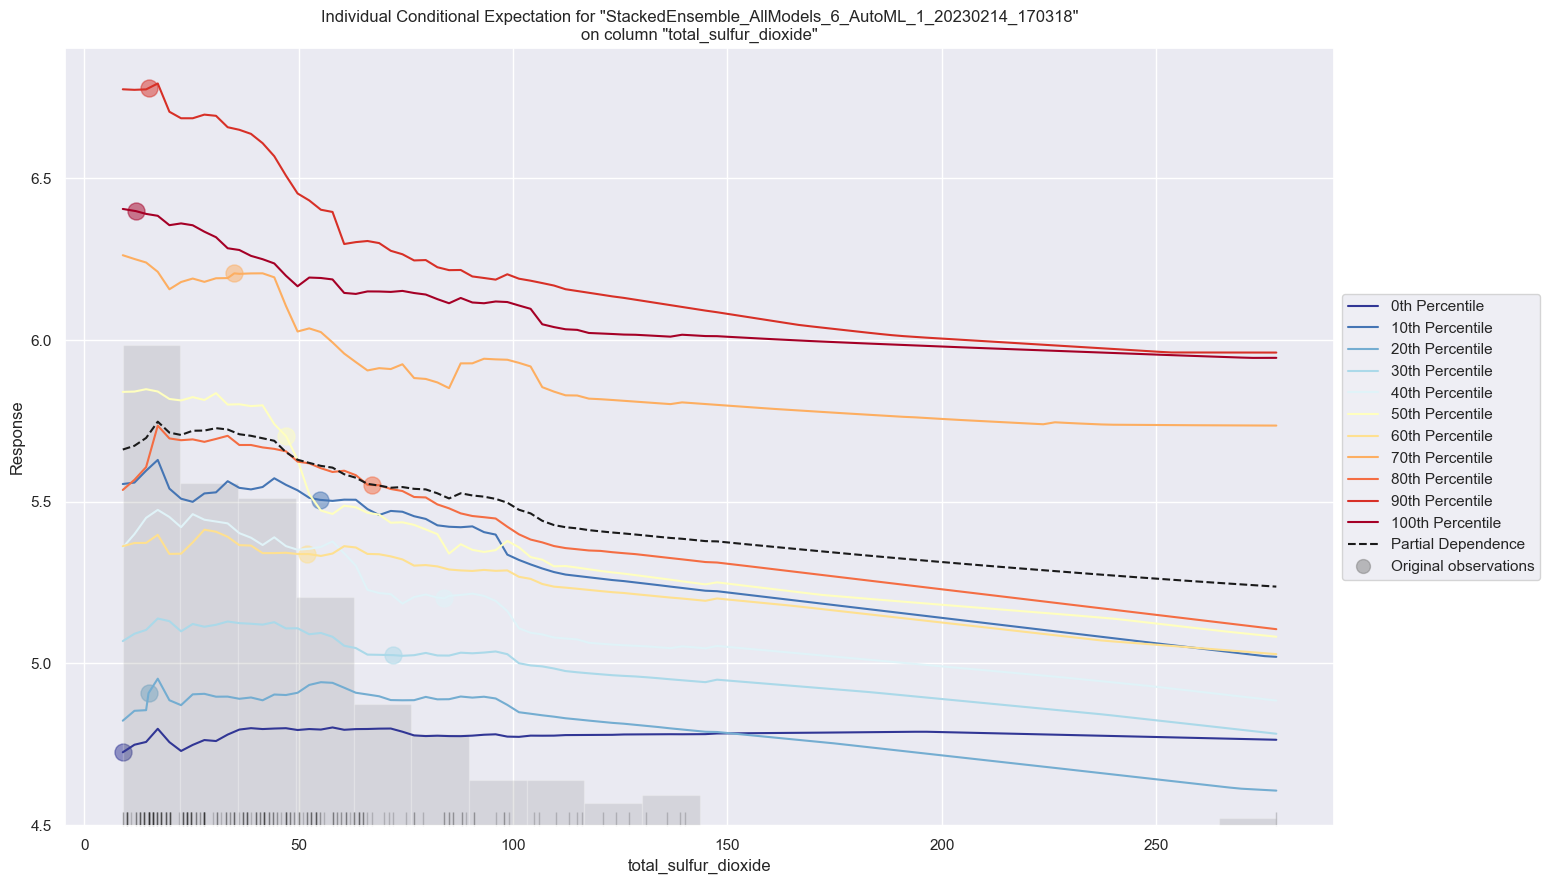

In [47]:
exa = aml.explain(df_test)

#Interpreting Best Model from AutoML

## Residual Analysis
- Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.


## SHAP Summary
From the SHAP summary diagram, we can interpret a few conclusions - 

1.   All the features are listed as per their importance in making the prediction, that is alcohol is more significant followed by volatile_acidity, and so on. Hence, free_sulphur_dioxide is the least significant predictor in our model.
2.   The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see Alcohol has the most impact on the quality of the wine. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Hight amount of alcohol results in high quality of wine, a low amount of volatile acidity results in high quality of wine, and so on. As we can see the distribution of red points in the Alcohol feature is far more spread than the blue points. From this visual, we can interpret that the quality of wine vastly increases as the amount of alcohol increases. It doesn't have much impact if the content is low i.e. between the shap value of 0.4 to 0.6 the blue data points are pretty concentrated. Inversely for the Volatile Acidity, less is better for the quality of the wine. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on the quality of the wine. 


The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

## Partial Dependence Plot (PDP)

A partial dependence plot shows the marginal effect of a feature on the target(wine quality in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - Alcohol and Sulphate. 

1.   As we can see that when the rest of the variables are kept constant and a 
marginal change is made in alcohol, we can see the mean response increases between alcohol levels of 11 and 12. This could be interpreted as this range of alcohol could be the deciding factor in the quality of the wine.
2.   Similarly when the rest of the variables are kept constant and a marginal change is made in sulfate we can observe the mean response of quality going up between the sulfate range of 0.4 to 0.8. Hence, it can be interpreted that this range is deciding factor in the quality of the wine. 

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

## ICE (Individual Conditional Expectation) Plot

ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value. 

Let us go back to the alcohol and sulfate features, as we interpreted in PDP the quality of wine increases when alcohol and sulfate value is between 11 to 12 and 0.4 to 0.8 respectively. But is this true for every wine in the dataset? ICE plot has an answer to this question. As we can see in the ICE plot above the quality of a few wines(0th percentile instance) increases a lot in this range while the quality of a few doesn't change much(100th Percentile Instance). 

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.

# Residual Analysis

Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# SHAP Summary

SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots
Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation
An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [48]:
import statsmodels.formula.api as smf  # OLS model Library

In [49]:
import h2o

pandas_df = h2o.as_list(df)

In [50]:
results = smf.ols(
    "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide +density + pH + sulphates + alcohol",
    data=pandas_df,
).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     61.49
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          4.26e-107
Time:                        17:08:05   Log-Likelihood:                -1106.7
No. Observations:                1143   AIC:                             2237.
Df Residuals:                    1131   BIC:                             2298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.5495 

# Interpreting Regression Co-efficients
**Model Co-efficients**

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target *increases* if the value of co-efficient *increases* and vice-versa. Whereas the negative values indicates that the value of target *increases* if the value of co-efficient *decreases* and vice versa.

High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above Alcohol and Sulphates seems to be the most important variables to predict target i.e. Quality of Wine. 

Also, it signifies that Higher the qualtity of Alcohol and sulphates - better is the quality of Wine.

**P-Values**

If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant
- volatile_acidity
- chlorides
- total_sulfur_dioxide
- alcohol
- sulphate

These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (Wine Quality).

**Skew and Kurtosis**

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as -0.143, 3.717 respectively.

**Durbin-Watson**

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.
- Value of 2 indicates that no auto correlation is detected
- Value between 0 to 2 indicates that there is positive auto correlation detected
- Value between 2 to 4 indicates that there is negatibe auto correlation detected

Our model has a DW score of 1.780 which could be interpreted as a positive auto-correlation in the residuals of regression. 

**Jarque-Bera Test**

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 28.421 which again re-inforces the interpretation we got from Skew and Kurtosis. 

Hyperparameter Tuning - Random Grid Search on GBM Model

In [51]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [52]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [53]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [54]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [55]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.35480524385153644
     0.7000000000000001   0.03          6.0          1.0                 gbm_grid2_model_6   0.36011221077943606
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.36263107258575494
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.364344908122557
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.3674971212149845
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.3683606689384931
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.3724886123948998
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.37428340832001145
     0.9                  0.04          4.0          0.9                 gbm_grid2_model_31  0.37433509827005
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.37435311278041256
---  ---                  ---           ---          ---                 ---                 ---
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.39677168032632376
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.3998045691918407
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.40472110583139626
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.4052656282885272
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.40594347949213744
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.4085508526510817
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.4313489971526621
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.434999581935655
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.4801953025626885
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.4814276437379456
[36 rows x 7 columns]

In [56]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [57]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.35480524385153644
     0.7000000000000001   0.03          6.0          1.0                 gbm_grid2_model_6   0.36011221077943606
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.36263107258575494
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.364344908122557
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.3674971212149845
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.3683606689384931
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.3724886123948998
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.37428340832001145
     0.9                  0.04          4.0          0.9                 gbm_grid2_model_31  0.37433509827005
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.37435311278041256
---  ---                  ---           ---          ---                 ---                 ---
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.39677168032632376
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.3998045691918407
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.40472110583139626
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.4052656282885272
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.40594347949213744
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.4085508526510817
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.4313489971526621
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.434999581935655
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.4801953025626885
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.4814276437379456
[36 rows x 7 columns]

In [58]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [59]:
models = gbm_gridperf2.models

In [60]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [61]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [62]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [63]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.3        0.03          8          1.0           0.354805
1               0.7        0.03          6          1.0           0.360112
2               0.9        0.03         10          0.5           0.362631
3               0.8        0.03          9          0.9           0.364345
4               0.7        0.06          5          0.6           0.367497
5               0.9        0.10          4          0.7           0.368361
6               0.1        0.06          8          0.9           0.372489
7               0.5        0.10          9          1.0           0.374283
8               0.9        0.04          4          0.9           0.374335
9               0.5        0.05          7          0.9           0.374353
10              0.2        0.04          5          0.9           0.375424
11              0.9        0.09          8          0.9           0.375609
12              0.8      

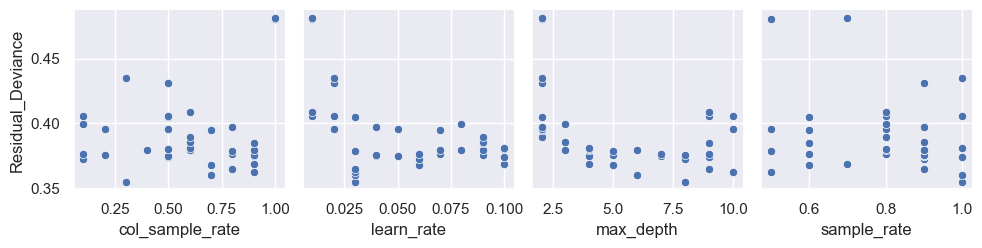

In [65]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Hyperparameter Tuning Analysis

- This is a summary of hyperparameter tuning for an XGBoost model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.

- Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 0.3, learn_rate of 0.03, max_depth of 8, and sample_rate of 1.0, with a Residual Deviance of 0.354805. The next best models had Residual Deviances in the range of 0.36-0.39, while the worst-performing models had Residual Deviances above 0.43.

- Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of an XGBoost model, and that hyperparameter tuning can lead to significant improvements in model performance.


Conclusion 
- Built a predictive model using H2O AutoML to predict the quality of wine using certain attributes.                                                  
- Studied the effects of Ridge and LASSO regularization on the GLM Model.
- Studied the importance of variable using SHAP summary.
- Performed the hyperparameterb tuning using Random Grid Search Method. 

References
- https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html
- https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
- https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

MIT License

Copyright (c) 2022 Karan Raman Agrawal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.